In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib.colors import ListedColormap
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as mtick
from bokeh.palettes import viridis
import statsmodels.api as sm
from sklearn import datasets

In [2]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

In [3]:
df_olymp = pd.read_csv('athlete_events.csv', index_col='ID')
df_regions = pd.read_csv('noc_regions.csv', index_col='NOC')

In [4]:
# insert missing entries for a few countries into df_regions
df_regions.loc['SGP'] = ['Singapore', np.nan]
df_regions.loc['TUV'] = ['Tuvalu', np.nan]
df_regions.loc['ROT'] = ['Refugee Olympic Athletes', np.nan]
df_regions.loc['UNK'] = ['Unknown', np.nan]
df_regions.loc['BOL'] = ['Bolivia', np.nan]

In [5]:
df_regions.drop(columns='notes', inplace=True)
df_regions.rename(columns={'region': 'Country'}, inplace=True)
df_regions['NOC'] = df_regions.index

### Region Dictionary to Dataframe

In [6]:
continents_dict = {"Africa": {"Eastern Africa": ["Burundi", "Comoros", "Djibouti", "Eritrea", "Ethiopia",
                                                 "Kenya", "Madagascar", "Malawi", "Mauritius", "Mayotte",
                                                 "Mozambique", "Reunion", "Rwanda", "Seychelles", "Somalia",
                                                 "South Sudan", "Uganda", "Tanzania", "Zambia", "Zimbabwe"],
                               "Middle Africa": ["Angola", "Cameroon", "Central African Republic", "Chad",
                                                 "Republic of Congo", "Democratic Republic of the Congo",
                                                 "Equatorial Guinea", "Gabon", "Sao Tome and Principe"],
                               "Northern Africa": ["Algeria", "Egypt", "Libya", "Morocco", "Sudan",
                                                   "Tunisia", "Western Sahara"],
                               "Southern Africa": ["Botswana", "Lesotho", "Namibia", "South Africa",
                                                   "Swaziland"],
                               "Western Africa": ["Benin", "Burkina Faso", "Cabo Verde", "Cape Verde",
                                                  "Cote d'Ivoire", "Ivory Coast", "Gambia", "Ghana", "Guinea",
                                                  "Guinea-Bissau", "Liberia", "Mali", "Mauritania", "Niger", 
                                                  "Nigeria", "Saint Helena", "Senegal", "Sierra Leone", 
                                                  "Togo"]},
                   "Asia": {"Central Asia": ["Kazakhstan", "Kyrgyzstan", "Tajikistan", "Turkmenistan",
                                             "Uzbekistan"],
                            "East Asia": ["China", "Hong Kong Special Administrative Region of China", 
                                          "Macao Special Administrative Region of China",
                                          "Democratic People's Republic of Korea", "North Korea", "Japan",
                                          "Mongolia", "Republic of Korea", "South Korea", "Taiwan"],
                            "South Central Asia": ["Afghanistan", "Bangladesh", "Bhutan", "India", "Iran",
                                                   "Maldives", "Nepal", "Pakistan", "Sri Lanka"],
                            "South East Asia": ["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", 
                                                "Myanmar", "Burma", "Philippines", "Singapore", "Thailand",
                                                "Timor-Leste", "East Timor", "Vietnam"],
                            "Middle East": ["Armenia", "Azerbaijan", "Bahrain", "Cyprus", "Georgia", "Iraq",
                                            "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine",
                                            "Qatar", "Saudi Arabia", "Syria", "Turkey", "United Arab Emirates",
                                            "Yemen"]},
                   "Europe": {"Eastern Europe": ["Belarus", "Bulgaria", "Czech Republic", "Hungary", "Poland",
                                                 "Moldova", "Romania", "Russia", "Slovakia", "Ukraine"],
                              "Northern Europe": ["Denmark", "Estonia", "Faroe Islands", "Finland",
                                                  "Aland Islands", "Iceland", "Ireland", "Latvia", "Lithuania", 
                                                  "Norway", "Svalbard and Jan Mayen Islands", "Sweden", "UK", 
                                                  "England", "Scotland", "Wales", "Northern Ireland",
                                                  "Isle of Man", "Channel Islands",  "Guernsey", "Jersey",
                                                  "Sark"],
                              "Southern Europe": ["Albania", "Andorra", "Bosnia and Herzegovina", "Croatia",
                                                  "Gibraltar", "Greece",  "Holy See", "Italy", "Macedonia",
                                                  "Malta", "Montenegro", "Kosovo", "Portugal", "San Marino", 
                                                  "Serbia", "Slovenia", "Spain"],
                              "Western Europe": ["Austria", "Belgium", "France", "Germany", "Liechtenstein",
                                                 "Luxembourg", "Monaco", "Netherlands", "Holland",
                                                 "Switzerland"]},
                   "North America": {"Caribbean": ["Anguilla", "Antigua", "Barbuda", "Aruba", "Bahamas",
                                                   "Barbados", "Bonaire", "Saint Eustatius and Saba",
                                                   "Virgin Islands, British", "Cayman Islands", "Cuba", 
                                                   "Curacao", "Dominica", "Dominican Republic", "Grenada", 
                                                   "Guadeloupe", "Haiti", "Jamaica", "Martinique", 
                                                   "Montserrat", "-Netherlands Antilles", "Puerto Rico", 
                                                   "Saint Barthelemy", "Saint Kitts", "Nevis", "Saint Lucia", 
                                                   "Saint Martin", "Saint Vincent", "The Grenadines", 
                                                   "Trinidad", "Tobago", "Turks and Caicos Islands", 
                                                   "Virgin Islands, US"],
                                     "Central America": ["Belize", "Costa Rica", "El Salvador", "Guatemala", 
                                                         "Honduras", "Mexico", "Nicaragua", "Panama"],
                                     "Northern America": ["Bermuda", "Canada", "Greenland", 
                                                          "Saint Pierre and Miquelon", "USA"]},
                   "Oceania": {"Australia and New Zealand": ["Australia", "New Zealand", "Norfolk Island"],
                               "Melanesia": ["Fiji", "New Caledonia", "Papua New Guinea", "Solomon Islands", 
                                             "Vanuatu"],
                               "Micronesia": ["Guam", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", 
                                              "Northern Mariana Islands", "Palau"],
                               "Polynesia": ["American Samoa", "Cook Islands", "French Polynesia", "Niue", 
                                             "Pitcairn", "Samoa", "Tokelau", "Tonga", "Tuvalu", 
                                             "Wallis and Futuna Islands"]},
                   "South America": {"South America": ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", 
                                                       "Ecuador", "Falkland Islands", "Malvinas", 
                                                       "French Guiana", "Guyana", "Paraguay", "Peru", 
                                                       "Suriname", "Uruguay", "Venezuela"]},
                   "Individual or Refugee": {"Individual": ["Individual Olympic Athletes"], 
                                              "Refugee": ["Refugee Olympic Athletes"], 
                                              "Unknown": ["Unknown"]}}


df_country = pd.DataFrame(columns=['Country', 'Region', 'Continent'])
df_country.set_index('Country', inplace=True)

for continent_name, region_dict in continents_dict.items():
    for region_name, countries_list in region_dict.items():
        for country_name in countries_list:
            df_country.loc[country_name] = [region_name, continent_name]

### Merge region dataframes with Olympic dataframe

In [7]:
df_country_regions = df_regions.merge(df_country, how='left', on='Country')
df_olymp = df_olymp.merge(df_country_regions, how='left', on='NOC')

### Edit & Add Columns

In [8]:
# set the null values to 0 so we can change the datatype in column age
df_olymp['Age'] = df_olymp['Age'].fillna(0)
df_olymp['Age'] = df_olymp['Age'].astype('int64')

# insert formula for bmi
df_olymp['BMI'] = df_olymp['Weight']/((df_olymp['Height']/100)**2)

# change weight to lbs 
df_olymp['Weight'] = df_olymp['Weight'].fillna(0)
df_olymp['Weight'] = (df_olymp['Weight'] * 2.204).round(1)

# revert zero values to null values so they're not included in mean calculations later
df_olymp.loc[df_olymp['Weight']==0.0, 'Weight'] = np.nan
df_olymp['Year'] = df_olymp['Year'].astype('int')

# create column for the gender of the event (setting unspecified events to A)
df_olymp['Event_gender'] = 'A'
womens = df_olymp['Event'].str.contains('Women')
df_olymp.loc[womens, 'Event_gender'] = 'F'
mens = df_olymp['Event'].str.contains('Men')
df_olymp.loc[mens, 'Event_gender'] = 'M'

# creating a key for each medal so that it isn't counted more than once
# when a team wins that medal
df_olymp['Medal_key'] = df_olymp['Medal'] + df_olymp['Games'] + df_olymp['Event'] + df_olymp['Team']

### Dictionaries for graph formatting

In [9]:
sctr = {'sz': (15,7.5), 'tfont': 21, 'xlabl': 'Year', 'xfont': 14, 'ylabl': 'BMI',
        'yfont': 14, 's': 30, 'colors': ['b', 'g', 'y', 'purple', 'orange', 'teal'],
        'alpha': .7}

ln = {'sz': (12,6), 'lnstl': ['solid','dashed'], 'width': 2, 'colors': ['g', 'purple'],
      'lfont': 10, 'l_labls': ['Female BMI', 'Female Age', 'Male BMI', 'Male Age'],
      'xlabl': 'Year', 'tfont': 18}

br = {'sz': (20,10), 'tfnt': 22, 'xlbl': 'Year', 'xfnt': 14.5, 'ylbl': 'Number of Events',
      'yfnt': 14.5, 'c_a': ['#bfbfbf', '#93f081', '#4d009a'],
      'l_labls': ["Non-Gendered", "Women's", "Men's"], 'l_font': 12}

colorz = viridis(6)

# Summer

In [10]:
df_summer = df_olymp.loc[df_olymp['Games'].str.contains('Summer')]

### Athlete Counts and Proportion Female by Sport

In [11]:
# the number and percent women in sports
pv_summer = df_summer.pivot_table(index=df_summer['Sport'], columns='Sex', values='Name', aggfunc='nunique')
pv_summer.fillna(0, inplace=True)
pv_summer['Total'] = pv_summer.sum(axis=1)
pv_summer['%F'] = pv_summer['F']/pv_summer['Total']
pv_summer[['M', 'F', 'Total']] = pv_summer[['M', 'F', 'Total']].astype('int')
pv_summer.style.format({'%F': '{:.2%}'})

In [12]:
# top six sports played by women in terms of numbers of players
highest_num = list(pv_summer.sort_values(by='F', ascending=False).head(6).index)

# top five sports in terms of highest percentage of women
highest_perc = pv_summer.sort_values(by='%F', ascending=False).head(11)
left_out = highest_perc.index.isin(['Softball', 'Rugby Sevens', 'Triathlon', 'Taekwondo', 'Trampolining'])
highest_perc = highest_perc.loc[~left_out]

highest_perc = list(highest_perc.index)

both_women = highest_num + highest_perc

## Average BMI for Most Common Women's Sports

In [13]:
top_sprt = df_olymp['Sport'].isin(both_women)
sx_f = df_olymp['Sex'] == 'F'
yr_64 = df_olymp['Year'] >= 1964

df_high_women = df_olymp[top_sprt & sx_f & yr_64]

pv_high_women = df_high_women.pivot_table(index=df_high_women['Year'], columns='Sport', values='BMI', 
                                          aggfunc='mean')
pv_high_women['Year'] = pv_high_women.index

### Sports with Highest Number of Women

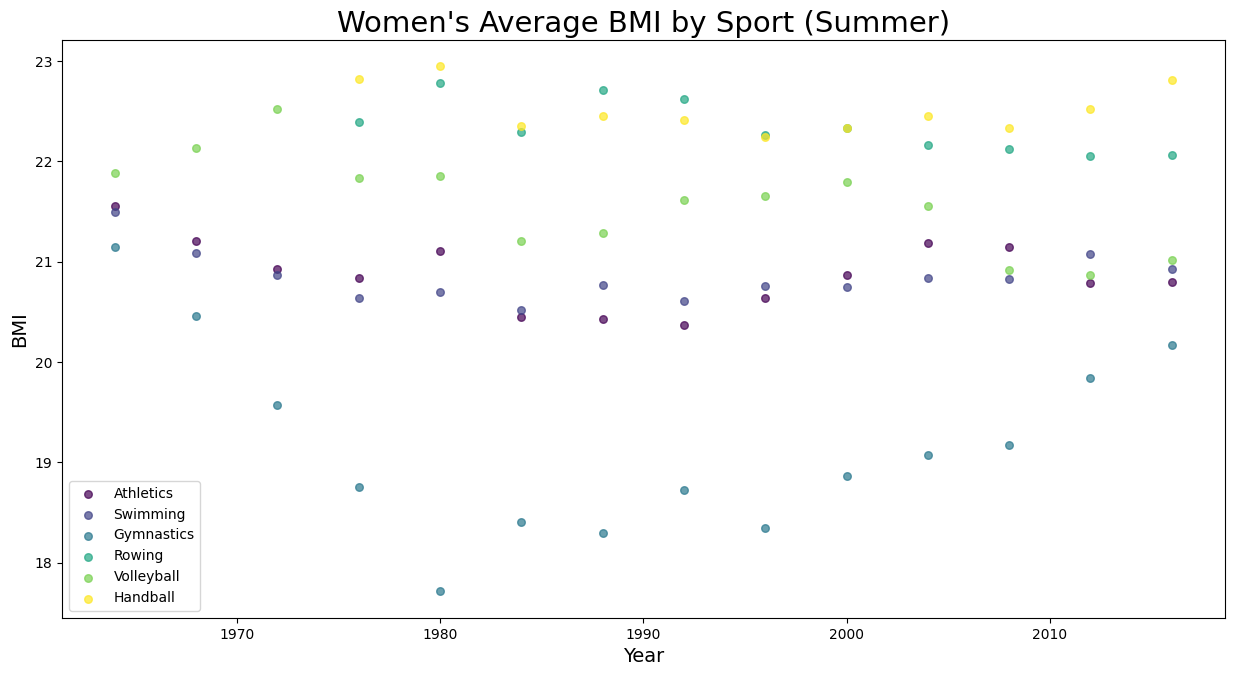

In [14]:
fig, ax = plt.subplots(figsize=sctr['sz'])

for counter, sport in enumerate(highest_num):
    ax.scatter(x=pv_high_women['Year'], y=pv_high_women[sport], color=colorz[counter], s=sctr['s'], 
               label=sport, alpha=sctr['alpha'])

plt.title("Women's Average BMI by Sport (Summer)", fontsize=sctr['tfont'])
plt.xlabel(sctr['xlabl'], fontsize=sctr['xfont'])
plt.ylabel(sctr['ylabl'], fontsize=sctr['yfont'])
plt.legend()

plt.show()

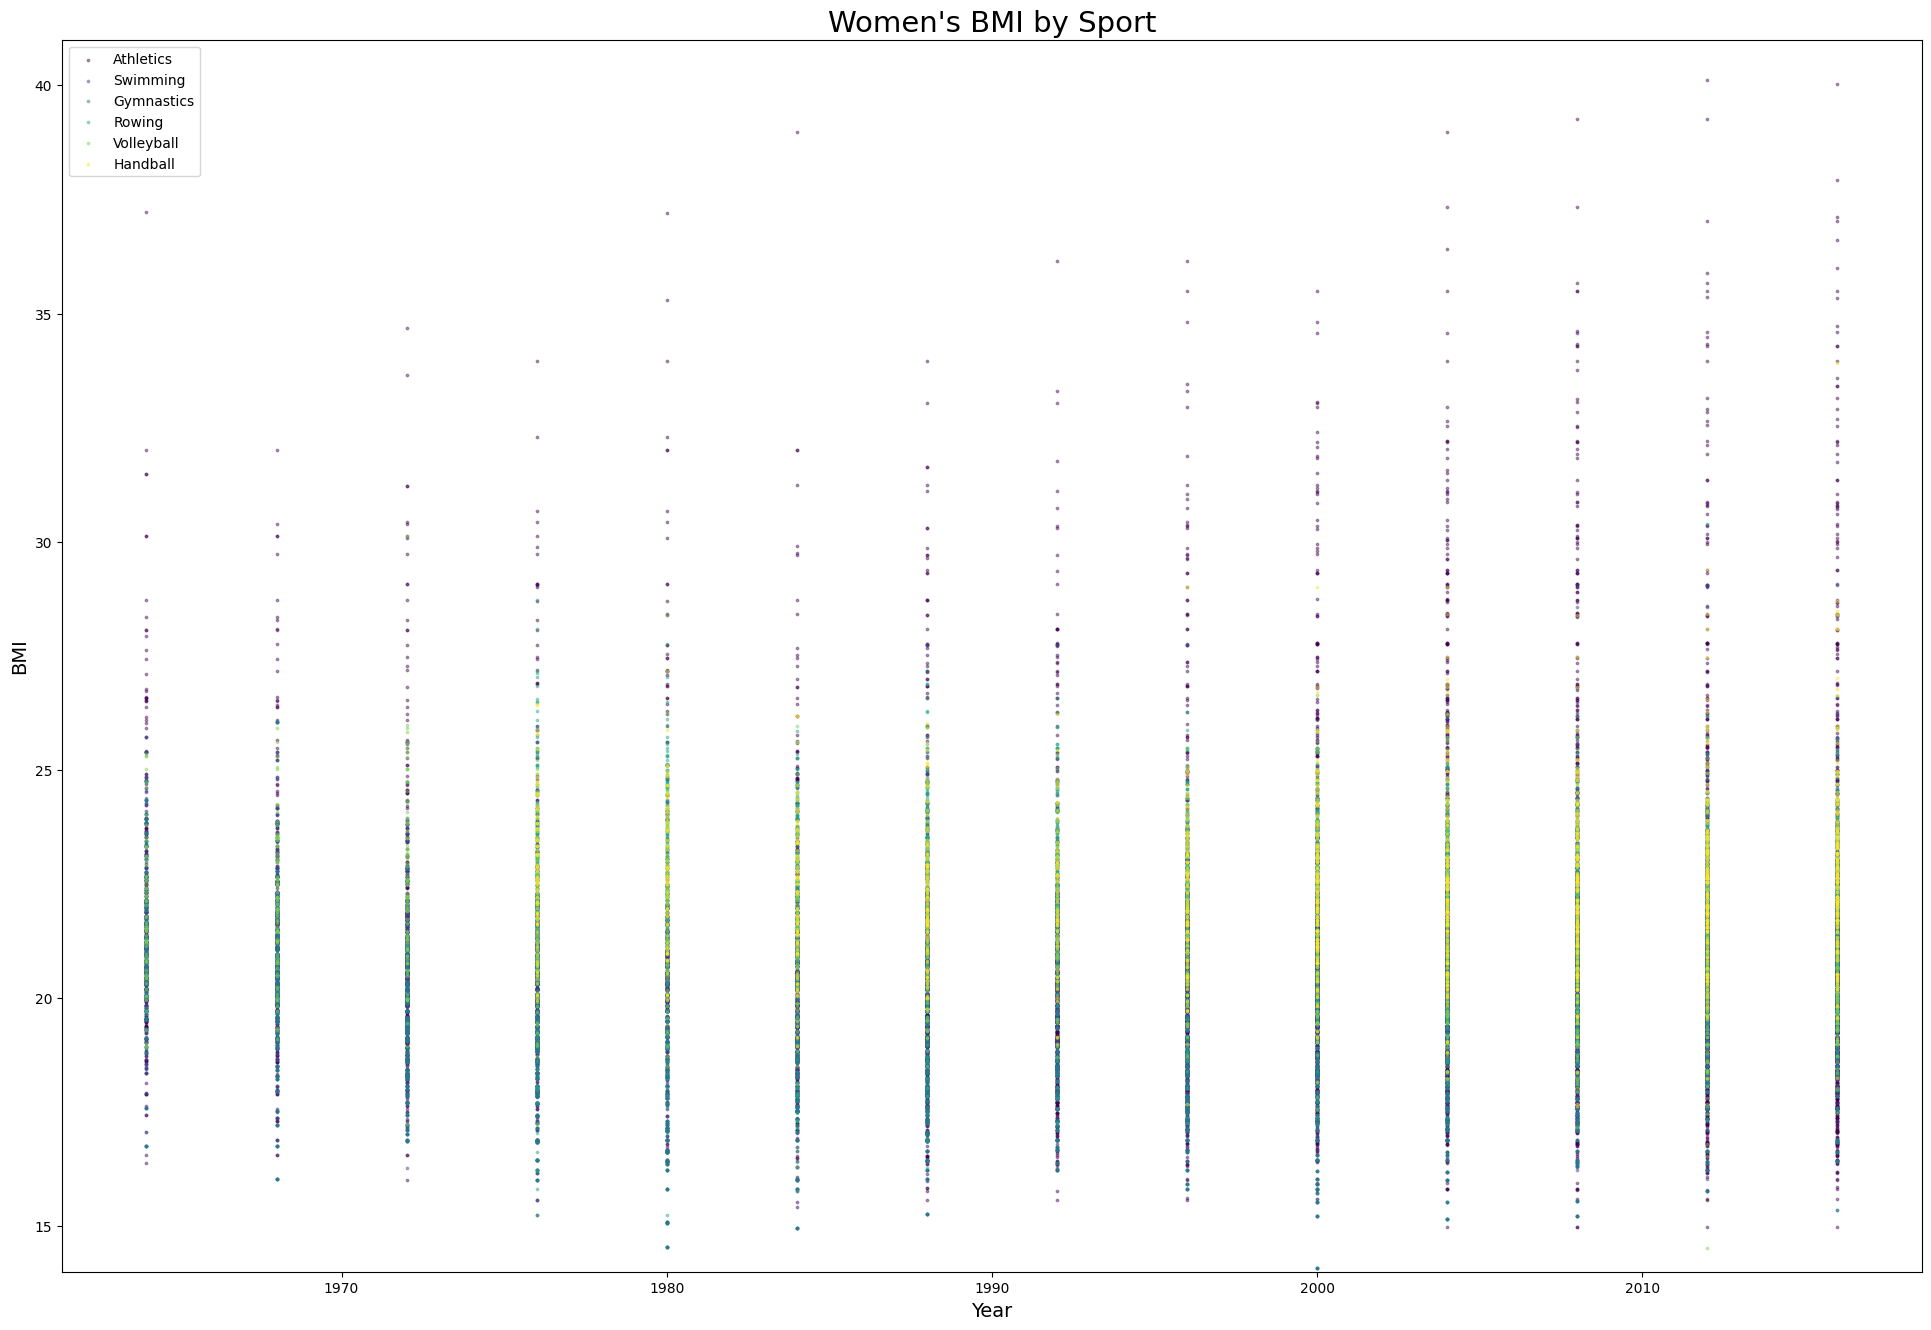

In [15]:
fig, ax = plt.subplots(figsize=(24,16))

for counter, sport in enumerate(highest_num):
    spec_sport_df = df_high_women[df_high_women['Sport']==sport]
    ax.scatter(x=spec_sport_df['Year'], y=spec_sport_df['BMI'], color=colorz[counter], s=3, label=sport, 
               alpha=.4)

plt.ylim(bottom=14, top=41)
plt.title("Women's BMI by Sport", fontsize=sctr['tfont'])
plt.xlabel(sctr['xlabl'], fontsize=sctr['xfont'])
plt.ylabel(sctr['ylabl'], fontsize=sctr['yfont'])
plt.legend()

plt.show()

### Female athlete's BMI per sport over time

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x1000 with 0 Axes>

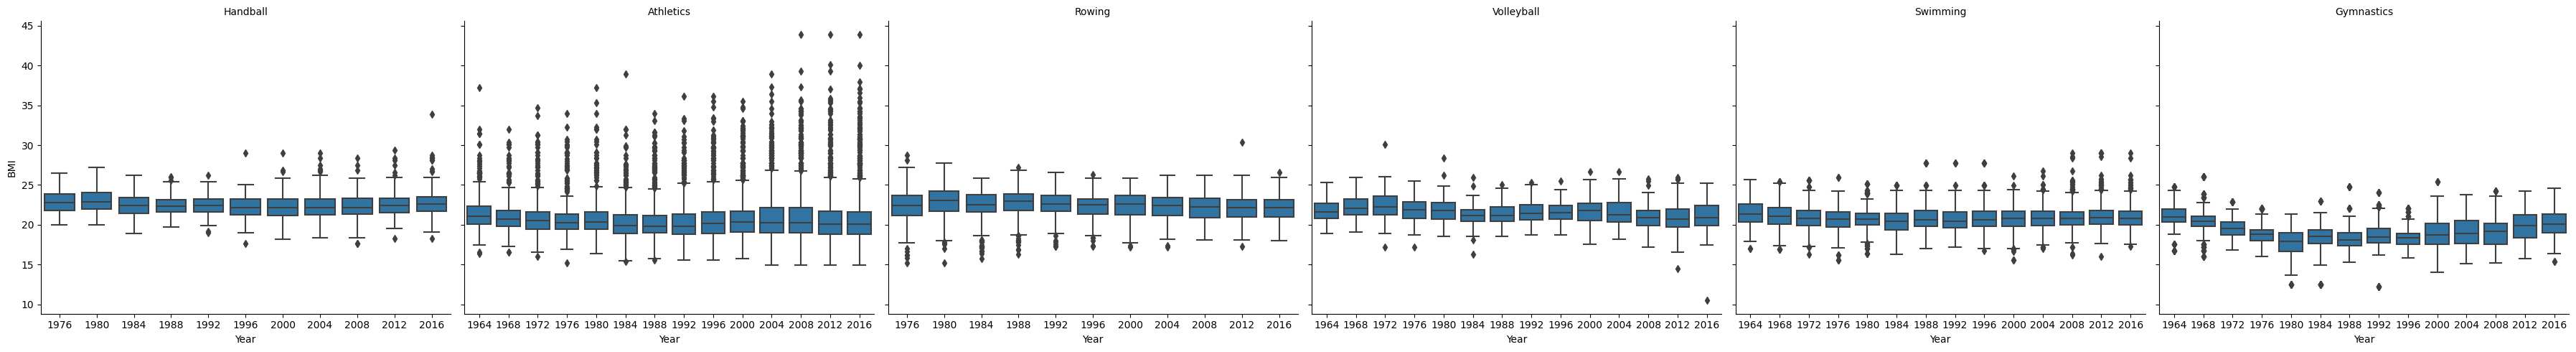

In [16]:
plt.figure(figsize=(30,10))
g = sns.FacetGrid(df_high_women[df_high_women['Sport'].isin(highest_num)], col='Sport', sharex=False, height=5, 
                  aspect=1.2)
g.map_dataframe(sns.boxplot, x='Year', y='BMI')
g.set_titles(col_template="{col_name}")
g.tight_layout()
plt.show()

### Sports with Highest Percentage Women

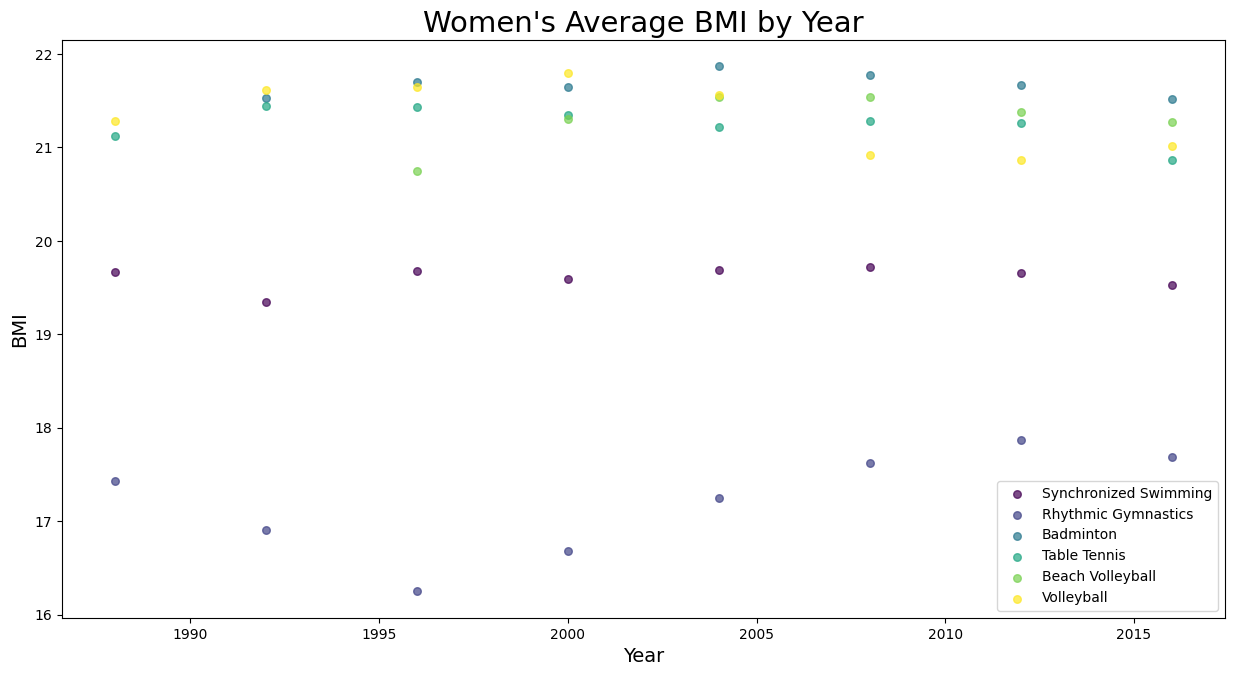

In [17]:
pv_high_women_88 = pv_high_women.loc[pv_high_women['Year']>=1988]

fig, ax = plt.subplots(figsize=sctr['sz'])

for counter, sport in enumerate(highest_perc):
    ax.scatter(x=pv_high_women_88['Year'], y=pv_high_women_88[sport], color=colorz[counter], 
               alpha=sctr['alpha'],label=sport, s=sctr['s'])

plt.title("Women's Average BMI by Year", fontsize=sctr['tfont'])
plt.xlabel(sctr['xlabl'], fontsize=sctr['xfont'])
plt.ylabel(sctr['ylabl'], fontsize=sctr['yfont'])
ax.legend()

plt.show()

## Gymnastics Average Age & BMI by Gender

In [18]:
fix_age = df_olymp['Age'] > 0
df_gym = df_olymp.loc[(df_olymp['Sport']=='Gymnastics')&(df_olymp['Year']>=1936) & fix_age]

pv_gym = df_gym.pivot_table(index=df_gym['Year'], columns='Sex', values=['BMI', 'Age'], aggfunc='mean')

pv_gym = pv_gym.loc[:,['BMI', 'Age']]
pv_gym

BMI                   Age           
Sex           F          M          F          M
Year                                            
1936  21.388251  22.289532  22.984375  25.994337
1948  22.265625  23.258285  23.583333  28.213217
1952  21.338427  22.995742  23.095768  26.703860
1956  21.511147  23.321104  22.504785  26.906393
1960  21.178108  22.868111  21.773743  25.958511
1964  21.144238  22.629634  21.924051  25.111881
1968  20.455325  22.480185  19.620102  24.126526
1972  19.569120  22.389947  18.312500  24.101136
1976  18.758913  22.104750  17.687251  22.525641
1980  17.714368  22.063384  16.312849  22.832677
1984  18.401825  22.476707  16.825858  22.847550
1988  18.296952  22.336753  16.881226  22.107914
1992  18.721553  22.487395  16.740602  22.449516
1996  18.349689  22.538039  16.789931  22.749086
2000  18.863264  22.583759  17.661355  23.289720
2004  19.072072  22.619237  18.143984  23.765528
2008  19.172369  22.555932  18.272517  24.228164
2012  19.840249  22.477650  19.570681  23.781116
2016  20.167598  22.406490  19.887728  24.002092

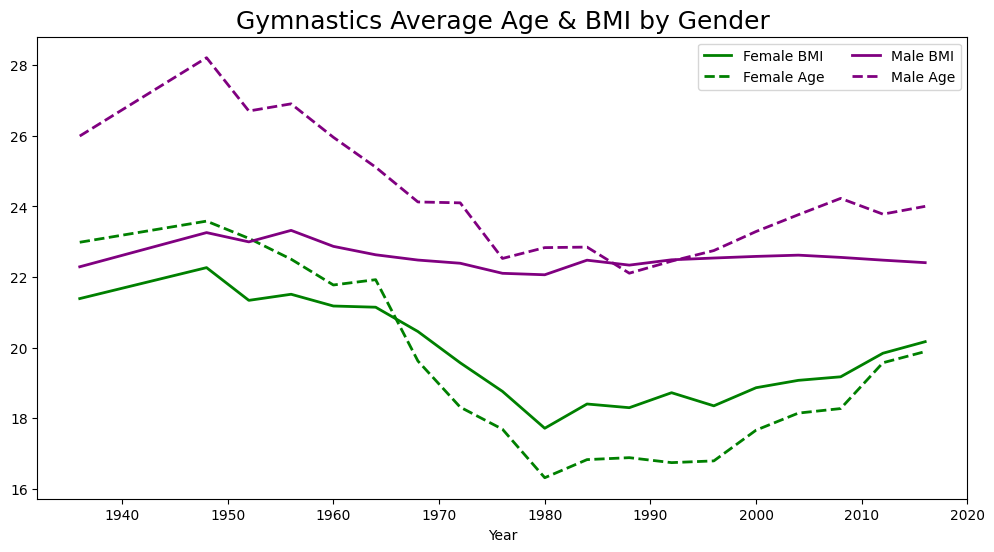

In [19]:
ax1 = pv_gym['BMI']['F'].plot.line(figsize=ln['sz'], linestyle=ln['lnstl'][0], linewidth=ln['width'], 
                                   color=ln['colors'][0])
pv_gym['Age']['F'].plot.line(linestyle=ln['lnstl'][1], linewidth=ln['width'], color=ln['colors'][0], ax=ax1)
pv_gym['BMI']['M'].plot.line(linestyle=ln['lnstl'][0], linewidth=ln['width'], color=ln['colors'][1], ax=ax1)
pv_gym['Age']['M'].plot.line(linestyle=ln['lnstl'][1], linewidth=ln['width'], color=ln['colors'][1], ax=ax1)
plt.title('Gymnastics Average Age & BMI by Gender', fontsize=ln['tfont'])
plt.legend(ncol=2, labels=ln['l_labls'])

plt.show()                 

## Volleyball Average Age & BMI by Gender

In [20]:
df_vol = df_olymp.loc[(df_olymp['Sport']=='Volleyball') & fix_age]
pv_vol = df_vol.pivot_table(index=df_vol['Year'], columns='Sex', values=['BMI', 'Age'], aggfunc='mean')
pv_vol = pv_vol[['BMI', 'Age']]
pv_vol

BMI                   Age           
Sex           F          M          F          M
Year                                            
1964  21.887474  23.255079  23.352941  25.801802
1968  22.134229  23.468044  23.252874  25.025210
1972  22.522495  23.480609  23.868132  24.321429
1976  21.837445  23.571061  22.927083  24.616667
1980  21.855374  23.516007  22.844444  25.257143
1984  21.201629  22.985356  22.300000  24.406780
1988  21.281801  23.185072  22.810526  25.041667
1992  21.614200  23.225805  23.415730  25.042254
1996  21.652962  23.299579  24.656716  25.297872
2000  21.796577  23.216784  24.927536  26.205674
2004  21.558246  23.287285  25.357143  27.307692
2008  20.918699  22.923792  25.450000  27.727273
2012  20.863541  23.158646  26.293706  27.006944
2016  21.020635  23.098262  26.640845  27.553191

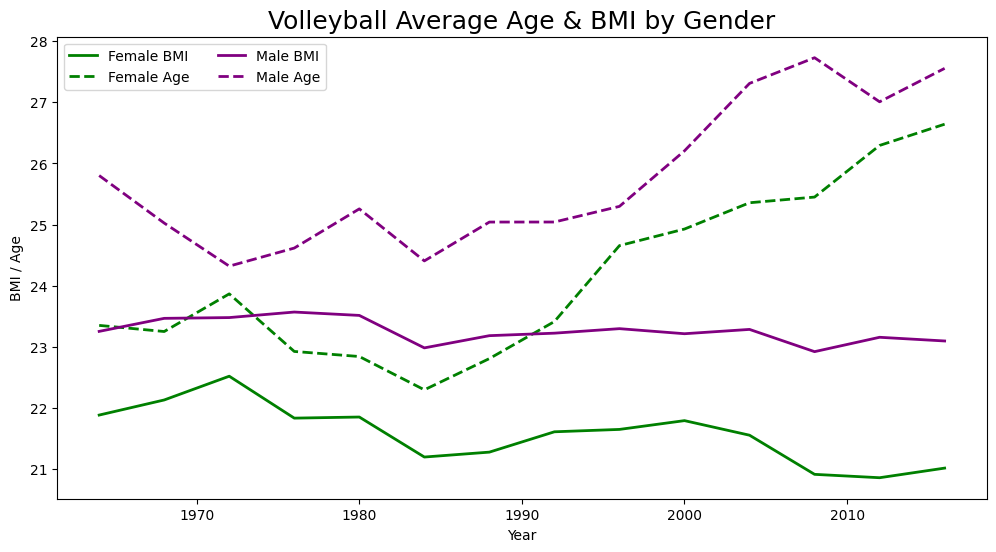

In [21]:
ax1 = pv_vol['BMI']['F'].plot.line(figsize=ln['sz'], linestyle=ln['lnstl'][0], linewidth=ln['width'], 
                                   color=ln['colors'][0])
pv_vol['Age']['F'].plot.line(linestyle=ln['lnstl'][1], linewidth=ln['width'], color=ln['colors'][0], ax=ax1)
pv_vol['BMI']['M'].plot.line(linestyle=ln['lnstl'][0], linewidth=ln['width'], color=ln['colors'][1], ax=ax1)
pv_vol['Age']['M'].plot.line(linestyle=ln['lnstl'][1], linewidth=ln['width'], color=ln['colors'][1], ax=ax1)

plt.title('Volleyball Average Age & BMI by Gender', fontsize=ln['tfont'])
plt.ylabel('BMI / Age')
plt.legend(fontsize=ln['lfont'], labels=ln['l_labls'], ncol=2)

plt.show()

# Winter

## Number of Athletes and Percentage of Women by Sport

In [22]:
df_winter = df_olymp[df_olymp['Games'].str.contains('Winter')]

In [23]:
# the counts and percentages of women in sports
pv_winter = df_winter.pivot_table(index=df_winter['Sport'], columns='Sex', values='Name', aggfunc='nunique')
pv_winter.fillna(0, inplace=True)
pv_winter['Total'] = pv_winter.sum(axis=1)
pv_winter['%F'] = pv_winter['F']/pv_winter['Total']
pv_winter[['F', 'M', 'Total']] = pv_winter[['F', 'M', 'Total']].astype('int')
pv_winter.style.format({'%F': '{:.2%}'})

## Average BMI in Most Common Women's Sports

In [24]:
high_num_w = list(pv_winter.sort_values(by='F', ascending=False).head(4).index)

high_perc_w = pv_winter.sort_values(by='%F', ascending=False)
excluded = high_perc_w.index.isin(['Curling', 'Freestyle Skiing', 'Short Track Speed Skating', 'Snowboarding'])
high_perc_w = list(high_perc_w.loc[~excluded].head(3).index)
both_wom_w = high_num_w + high_perc_w

pv_winter_women = df_olymp[(df_olymp['Sport'].isin(both_wom_w))&(df_olymp['Year'] >= 1952)]
pv_winter_women = pv_winter_women.pivot_table(index='Year', columns='Sport', values='BMI', aggfunc='mean')
wint_sports = pv_winter_women.columns
pv_winter_women['Year'] = pv_winter_women.index
pv_winter_women

Sport  Alpine Skiing  Cross Country Skiing  Figure Skating  Speed Skating  \
Year                                                                        
1952       22.247577             22.077907       20.509411      22.756386   
1956       22.853360             22.737796       20.446262      23.568214   
1960       22.989860             22.639247       20.983969      23.046719   
1964       23.251688             22.458769       21.653639      23.115190   
1968       22.972778             22.476719       20.941168      22.847254   
1972       22.382489             22.140499       20.998262      22.541276   
1976       22.534803             22.140673       20.205360      22.814398   
1980       22.518518             21.908198       19.863010      22.647424   
1984       22.887378             21.661249       20.294120      22.835646   
1988       23.267460             21.609298       20.896147      23.017692   
1992       23.967056             21.553751       20.983626      23.131376   
1994       24.087106             21.665794       20.966756      23.142252   
1998       24.706578             21.623679       20.836321      23.187839   
2002       24.857737             21.736573       20.929125      23.079066   
2006       24.530987             21.816203       20.856056      23.122734   
2010       24.350023             21.652544       20.867909      23.070742   
2014       24.185233             21.807450       20.915191      22.917310   

Sport  Year  
Year         
1952   1952  
1956   1956  
1960   1960  
1964   1964  
1968   1968  
1972   1972  
1976   1976  
1980   1980  
1984   1984  
1988   1988  
1992   1992  
1994   1994  
1998   1998  
2002   2002  
2006   2006  
2010   2010  
2014   2014

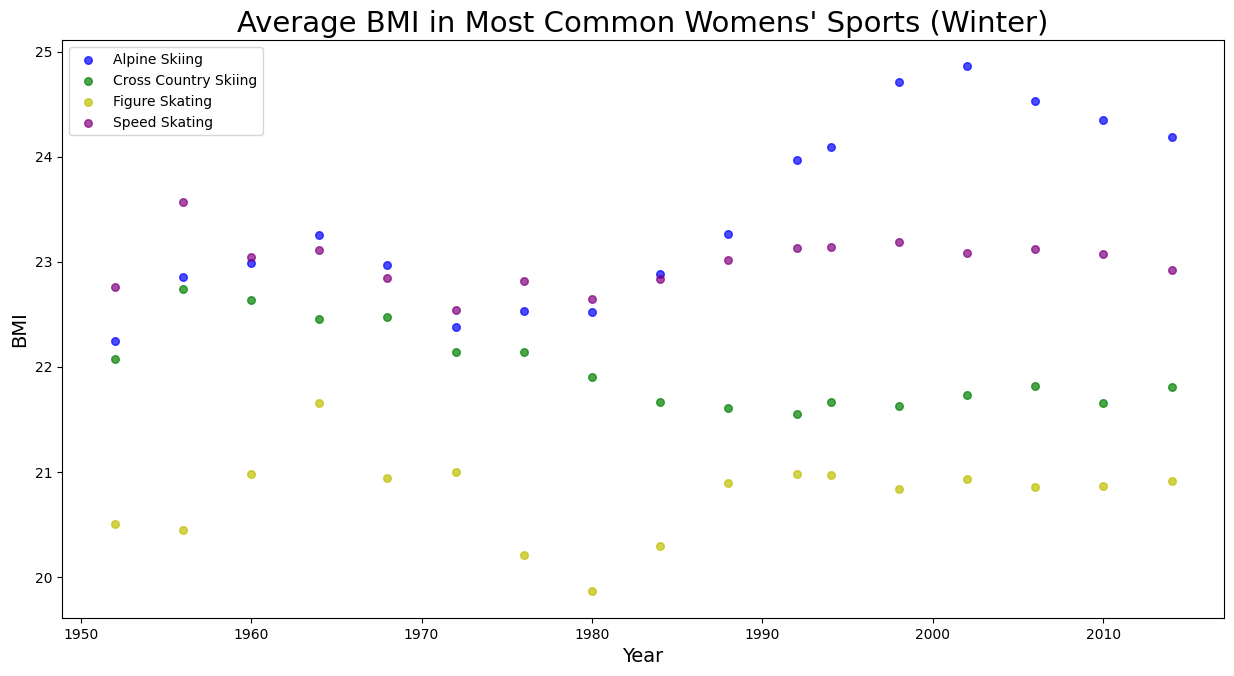

In [25]:
fig, ax = plt.subplots(figsize=sctr['sz'])

for counter, sport in enumerate(wint_sports):
    ax.scatter(x=pv_winter_women['Year'], y=pv_winter_women[sport], color=sctr['colors'][counter], 
               alpha=sctr['alpha'], s=sctr['s'], label=sport)

plt.title("Average BMI in Most Common Womens' Sports (Winter)", fontsize=sctr['tfont'])
plt.xlabel(sctr['xlabl'], fontsize=sctr['xfont'])
plt.ylabel(sctr['ylabl'], fontsize=sctr['yfont'])
plt.legend()

plt.show()

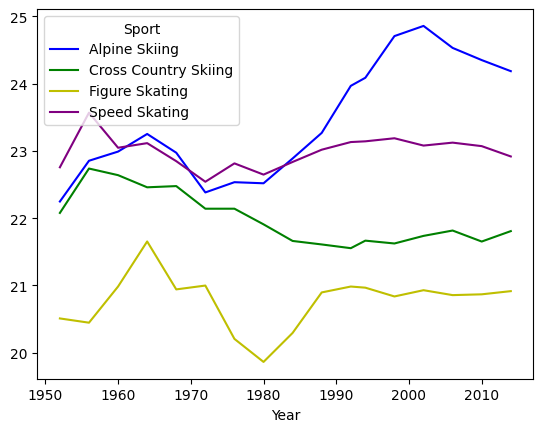

In [26]:
columns_list = [col_name for col_name in pv_winter_women.columns if col_name != "Year"]
pv_winter_women[columns_list].plot.line(color=sctr['colors'])

plt.show()

## Speed Skating Average Age & BMI by Gender

In [27]:
af_64 = df_olymp['Year'] >= 1964
sp_sk = df_olymp['Sport'] == 'Speed Skating'
df_skate = df_olymp[af_64 & sp_sk & fix_age]

pv_skate = df_skate.pivot_table(index=df_skate['Year'], columns='Sex', values=['BMI', 'Age'], aggfunc='mean')

pv_skate = pv_skate[['BMI', 'Age']]
pv_skate

BMI                   Age           
Sex           F          M          F          M
Year                                            
1964  22.595672  23.487887  23.008772  24.150289
1968  21.919064  23.485029  21.752212  24.365269
1972  21.883947  23.127266  21.982609  24.674419
1976  22.074996  23.411346  22.169811  24.411348
1980  21.556643  23.520049  21.781250  23.309524
1984  22.018344  23.374527  21.976744  23.412060
1988  22.351024  23.499174  23.158273  23.893048
1992  22.152662  23.854999  23.405229  23.363184
1994  22.149726  23.953288  23.615385  23.760000
1998  22.071999  24.194031  24.531646  24.610169
2002  21.978640  24.023180  25.441558  25.853933
2006  22.176918  23.978246  25.338889  25.793970
2010  22.187539  23.925456  25.644444  25.241935
2014  21.965407  23.842474  26.011050  25.454545

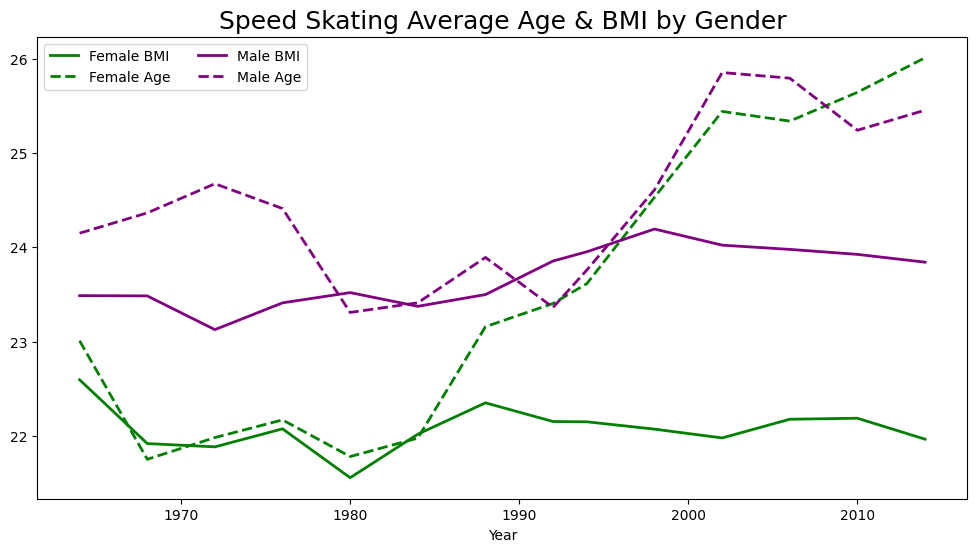

In [28]:
ax1 = pv_skate['BMI']['F'].plot.line(figsize=ln['sz'], linestyle=ln['lnstl'][0], linewidth=ln['width'], 
                                     color=ln['colors'][0])
pv_skate['Age']['F'].plot.line(linestyle=ln['lnstl'][1], linewidth=ln['width'], color=ln['colors'][0], ax=ax1)
pv_skate['BMI']['M'].plot.line(linestyle=ln['lnstl'][0], linewidth=ln['width'], color=ln['colors'][1], ax=ax1)
pv_skate['Age']['M'].plot.line(linestyle=ln['lnstl'][1], linewidth=ln['width'], color=ln['colors'][1], ax=ax1)
plt.title('Speed Skating Average Age & BMI by Gender', fontsize=ln['tfont'])
plt.legend(fontsize=ln['lfont'], labels=ln['l_labls'], ncol=2)
plt.show()

## Cross Country Skiing Average Age & BMI by Gender

In [29]:
df_ski = df_olymp[(df_olymp['Sport']=='Cross Country Skiing') & fix_age]
pv_ski = df_ski.pivot_table(index=df_ski['Year'], columns='Sex', values=['BMI', 'Age'], aggfunc='mean')
pv_ski['Year'] = pv_ski.index
pv_ski = pv_ski[pv_ski['Year'] >= 1960] 
pv_ski = pv_ski[['BMI', 'Age']]

pv_ski

BMI                   Age           
Sex           F          M          F          M
Year                                            
1960  21.772444  22.935229  26.128205  27.040000
1964  21.677602  22.750052  25.593407  27.041494
1968  21.808815  22.710226  27.173913  26.391129
1972  21.210966  22.655451  24.855932  25.649770
1976  20.812605  22.814820  23.427419  25.402214
1980  20.409010  22.752052  23.972222  24.855721
1984  20.459432  22.405232  24.291667  24.656140
1988  20.325505  22.486827  24.090476  25.216981
1992  20.308204  22.521204  24.943262  24.577011
1994  20.413501  22.629096  25.289286  25.919220
1998  20.487945  22.600938  26.020588  26.488550
2002  20.659083  22.633622  26.375706  27.071429
2006  20.761801  22.683419  26.016393  26.560538
2010  20.709564  22.522404  26.806268  27.176471
2014  20.715745  22.713619  27.224138  27.230216

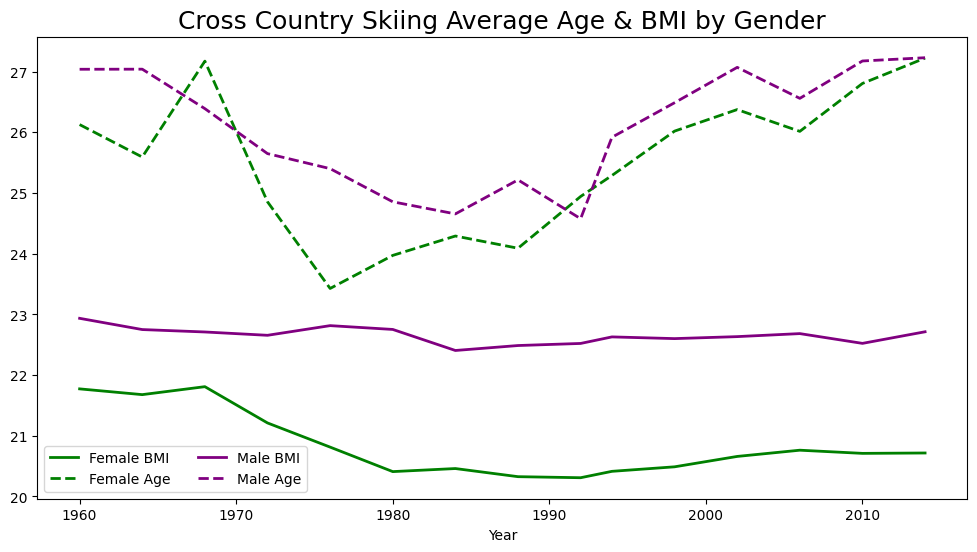

In [30]:
ax1 = pv_ski['BMI']['F'].plot.line(figsize=ln['sz'], linestyle=ln['lnstl'][0], linewidth=ln['width'], 
                                   color=ln['colors'][0])
pv_ski['Age']['F'].plot.line(linestyle=ln['lnstl'][1], linewidth=ln['width'], color=ln['colors'][0], ax=ax1)
pv_ski['BMI']['M'].plot.line(linestyle=ln['lnstl'][0], linewidth=ln['width'], color=ln['colors'][1], ax=ax1)
pv_ski['Age']['M'].plot.line(linestyle=ln['lnstl'][1], linewidth=ln['width'], color=ln['colors'][1], ax=ax1)
plt.title('Cross Country Skiing Average Age & BMI by Gender', fontsize=ln['tfont'])
plt.legend(fontsize=ln['lfont'], labels=ln['l_labls'], ncol=2)
plt.show()

# Both Seasons

## Event Gender Percentage

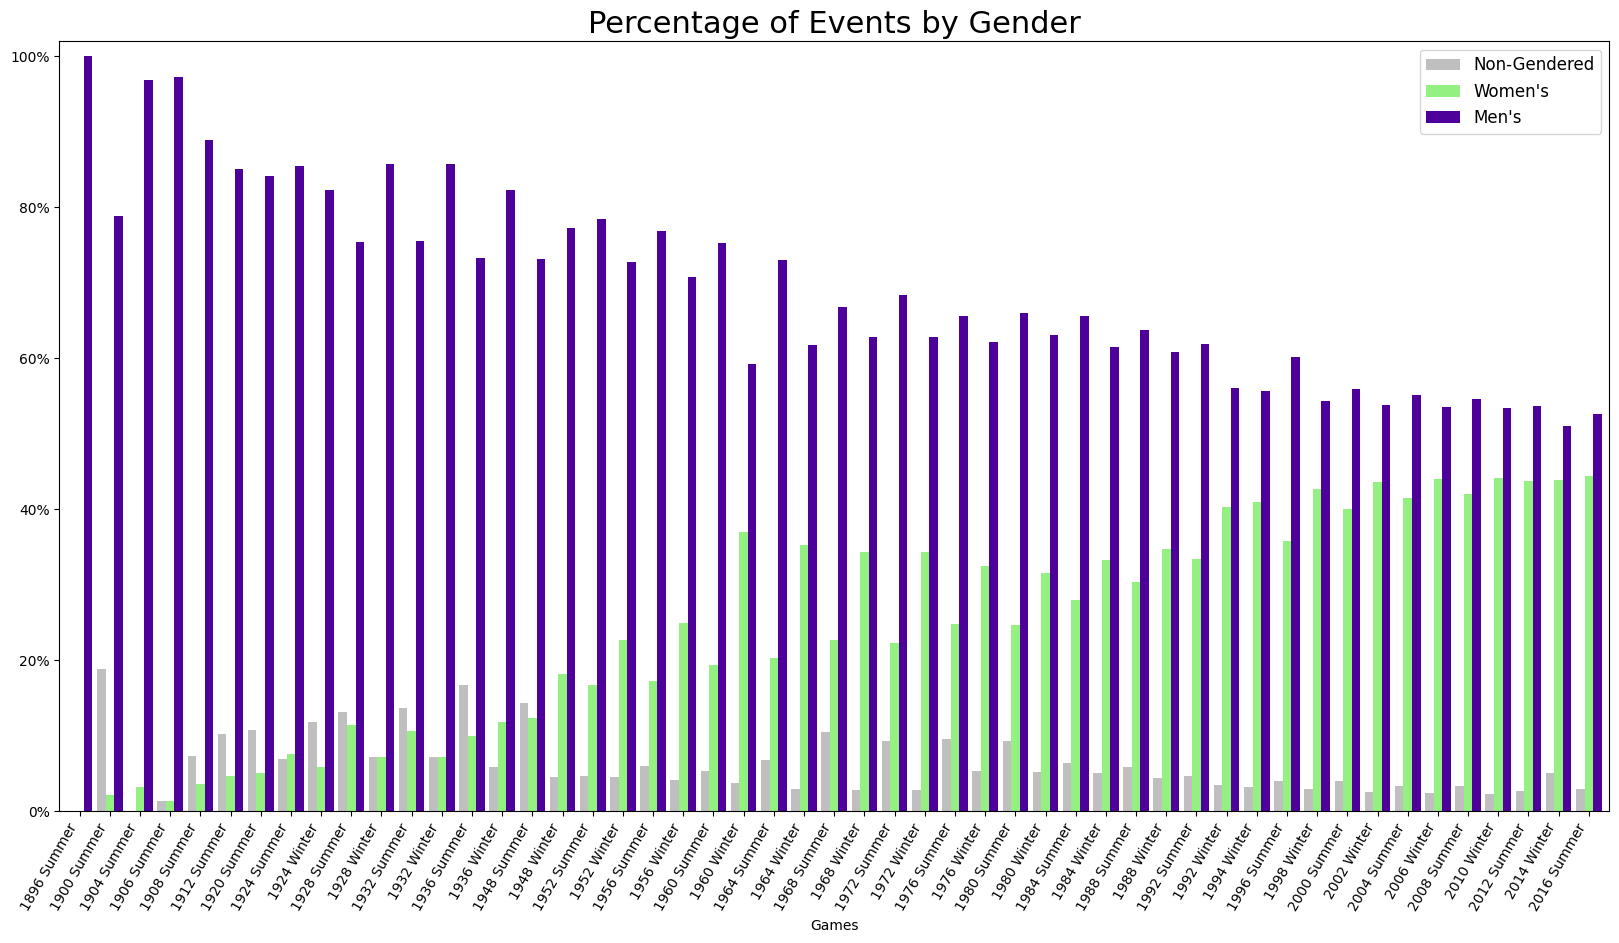

In [31]:
# pivot table of the number of events by gender
pv_gen_event = df_olymp.pivot_table(index=df_olymp['Games'], columns='Event_gender', values='Event', 
                                    aggfunc='nunique')

pv_gen_event = pv_gen_event.apply(lambda x: x/x.sum(), axis=1)

# bar graph of the number of different mens/womens events
ax = pv_gen_event.plot.bar(figsize=(20,10), color=br['c_a'], width=.85)
plt.title('Percentage of Events by Gender', fontsize=22)
plt.xticks(rotation=60, ha='right')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
plt.ylim(top=1.02)
plt.legend(labels=br['l_labls'], fontsize=br['l_font'])
plt.show()

## Summer

In [32]:
# makes lists of just the years
pv_summer_event = df_summer.pivot_table(index='Year', columns='Event_gender', values='Event', aggfunc='nunique')
years_summer = list(pv_summer_event.index)

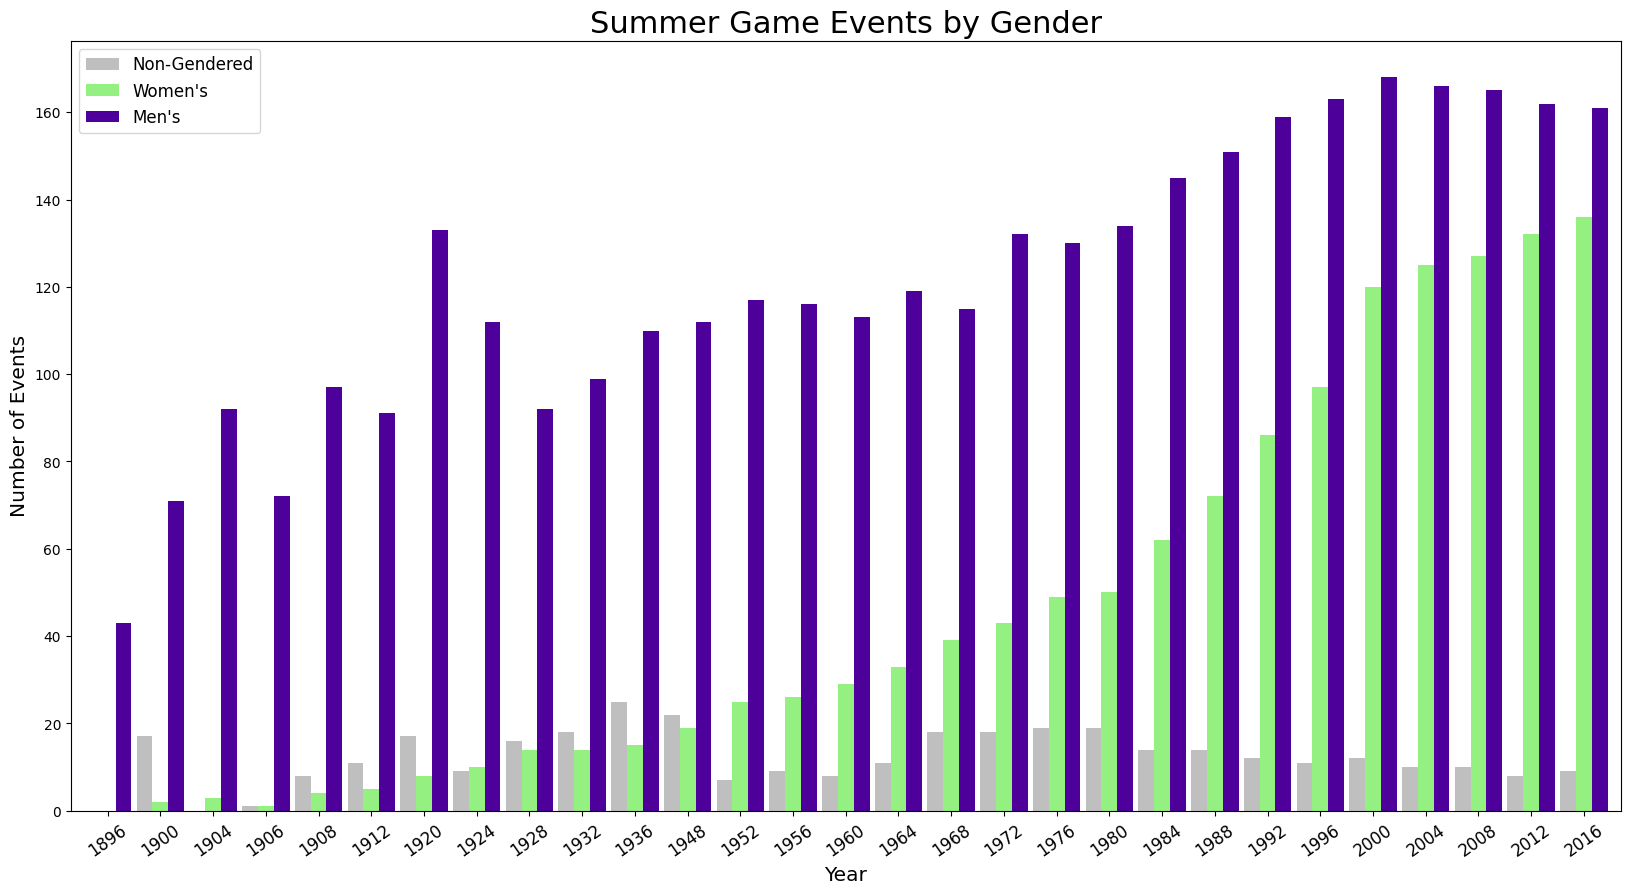

In [33]:
# BAR GRAPH FOR SUMMER EVENTS
pv_summer_event.plot.bar(figsize=br['sz'], color=br['c_a'], width=.9)
plt.title('Summer Game Events by Gender', fontsize=br['tfnt'])
plt.xlabel(br['xlbl'], fontsize=br['xfnt'])
plt.ylabel(br['ylbl'], fontsize=br['yfnt'])
# set xtick locations with numpy.arange (evenly spaced points between 0 up to (but not including) the len(list)
# then it sets the labels as the without summer list that was generated in the cell above
plt.xticks(np.arange(0, (len(pv_summer_event.index))), years_summer, rotation=35, ha='center', fontsize=12)
plt.legend(labels=br['l_labls'], fontsize=br['l_font'])
plt.show()

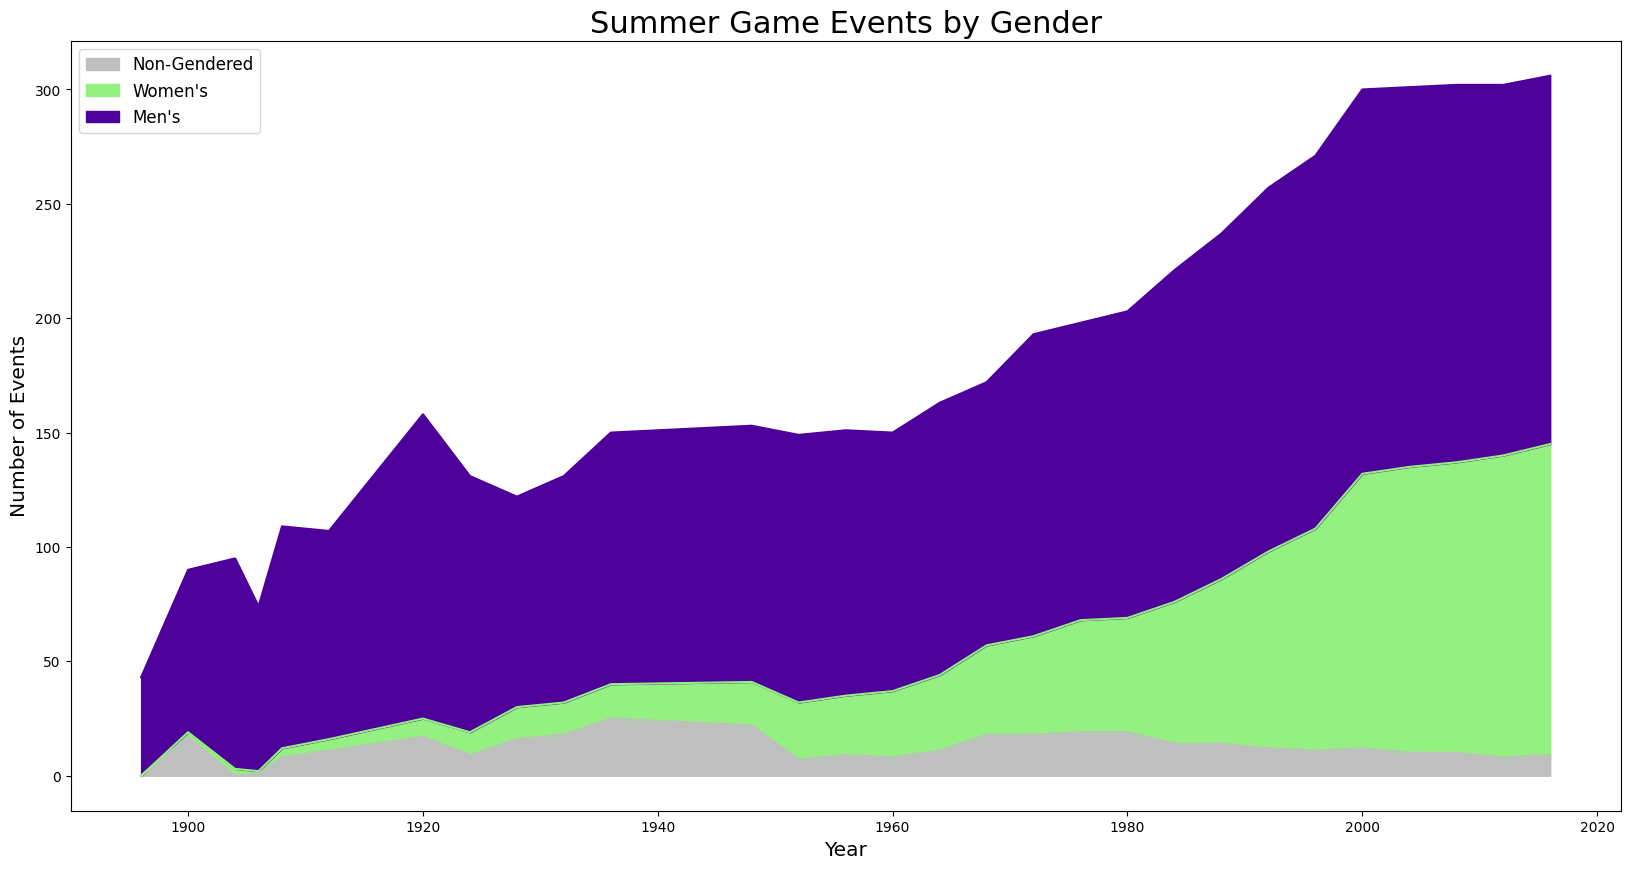

In [34]:
# AREA GRAPH FOR SUMMER EVENTS BY GENDER
ax = pv_summer_event.plot.area(figsize=br['sz'], color=br['c_a'])
plt.title('Summer Game Events by Gender', fontsize=br['tfnt'])
plt.xlabel(br['xlbl'], fontsize=br['xfnt'])
plt.ylabel(br['ylbl'], fontsize=br['yfnt'])

handles, previous_labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=br['l_labls'], fontsize=br['l_font'])
plt.show()

## Winter

In [35]:
pv_winter_event = df_winter.pivot_table(index='Year', columns='Event_gender', values='Event', aggfunc='nunique')
years_winter = list(pv_winter_event.index)

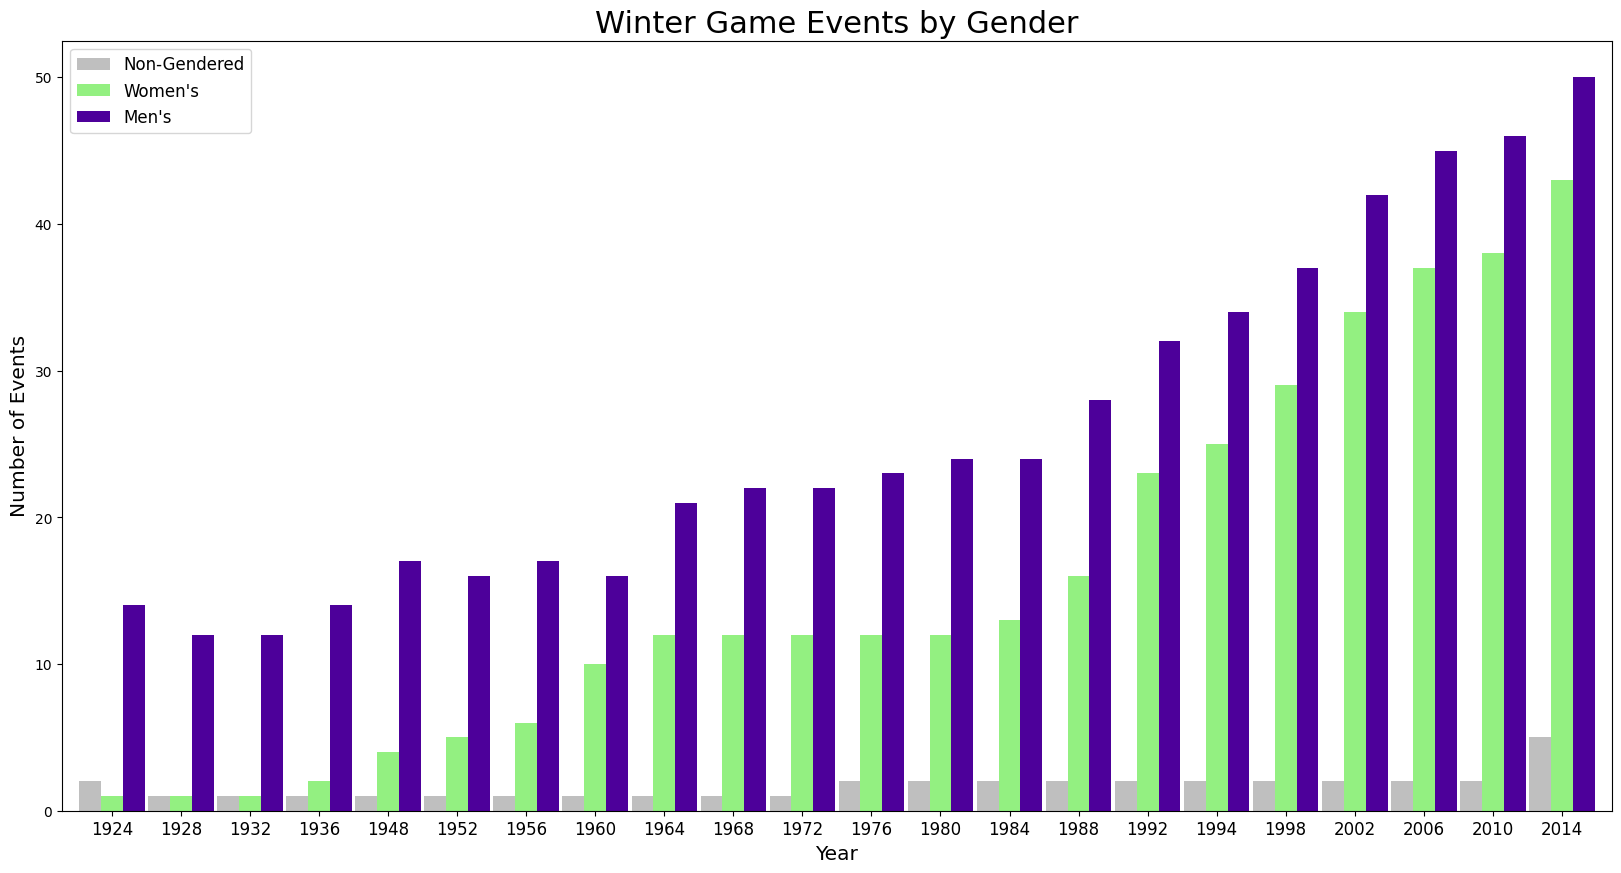

In [36]:
# BAR GRAPH FOR WINTER EVENTS BY GENDER
pv_winter_event.plot.bar(figsize=br['sz'], color=br['c_a'], width=.95)
plt.title('Winter Game Events by Gender', fontsize=br['tfnt'])
plt.xlabel(br['xlbl'], fontsize=br['xfnt'])
plt.ylabel(br['ylbl'], fontsize=br['yfnt'])
plt.xticks(np.arange(0, (len(pv_winter_event.index))), years_winter, rotation=0, ha='center', fontsize=12)

plt.legend(labels=br['l_labls'], fontsize=br['l_font'])

plt.show()

## Both Seasons 

### Competitor Gender Proportions

In [37]:
# PIVOT TABLE TO COUNT THE NUMBER OF MALE OR FEMALE COMPETITORS IN EACH GAME
df_games_pvt = df_olymp.pivot_table(index=df_olymp['Games'], columns=['Sex'], values='Name', aggfunc='nunique', 
                                    fill_value=0)

df_games_pvt = df_games_pvt.apply(lambda x: x/x.sum(), axis=1)

df_games_pvt

Sex                 F         M
Games                          
1896 Summer  0.000000  1.000000
1900 Summer  0.018852  0.981148
1904 Summer  0.009231  0.990769
1906 Summer  0.007134  0.992866
1908 Summer  0.021739  0.978261
1912 Summer  0.022001  0.977999
1920 Summer  0.029159  0.970841
1924 Summer  0.047912  0.952088
1924 Winter  0.041534  0.958466
1928 Summer  0.096118  0.903882
1928 Winter  0.060738  0.939262
1932 Summer  0.104579  0.895421
1932 Winter  0.083333  0.916667
1936 Summer  0.080544  0.919456
1936 Winter  0.119760  0.880240
1948 Summer  0.101318  0.898682
1948 Winter  0.115269  0.884731
1952 Summer  0.105658  0.894342
1952 Winter  0.157061  0.842939
1956 Summer  0.114764  0.885236
1956 Winter  0.160780  0.839220
1960 Summer  0.114622  0.885378
1960 Winter  0.216541  0.783459
1964 Summer  0.132450  0.867550
1964 Winter  0.182815  0.817185
1968 Summer  0.141030  0.858970
1968 Winter  0.181897  0.818103
1972 Summer  0.149191  0.850809
1972 Winter  0.204365  0.795635
1976 Summer  0.207578  0.792422
1976 Winter  0.204969  0.795031
1980 Summer  0.213823  0.786177
1980 Winter  0.219421  0.780579
1984 Summer  0.230747  0.769253
1984 Winter  0.217767  0.782233
1988 Summer  0.260777  0.739223
1988 Winter  0.221053  0.778947
1992 Summer  0.290054  0.709946
1992 Winter  0.270961  0.729039
1994 Winter  0.300345  0.699655
1996 Summer  0.340112  0.659888
1998 Winter  0.361800  0.638200
2000 Summer  0.381955  0.618045
2002 Winter  0.369212  0.630788
2004 Summer  0.406831  0.593169
2006 Winter  0.382919  0.617081
2008 Summer  0.422798  0.577202
2010 Winter  0.407101  0.592899
2012 Summer  0.442308  0.557692
2014 Winter  0.401603  0.598397
2016 Summer  0.450242  0.549758

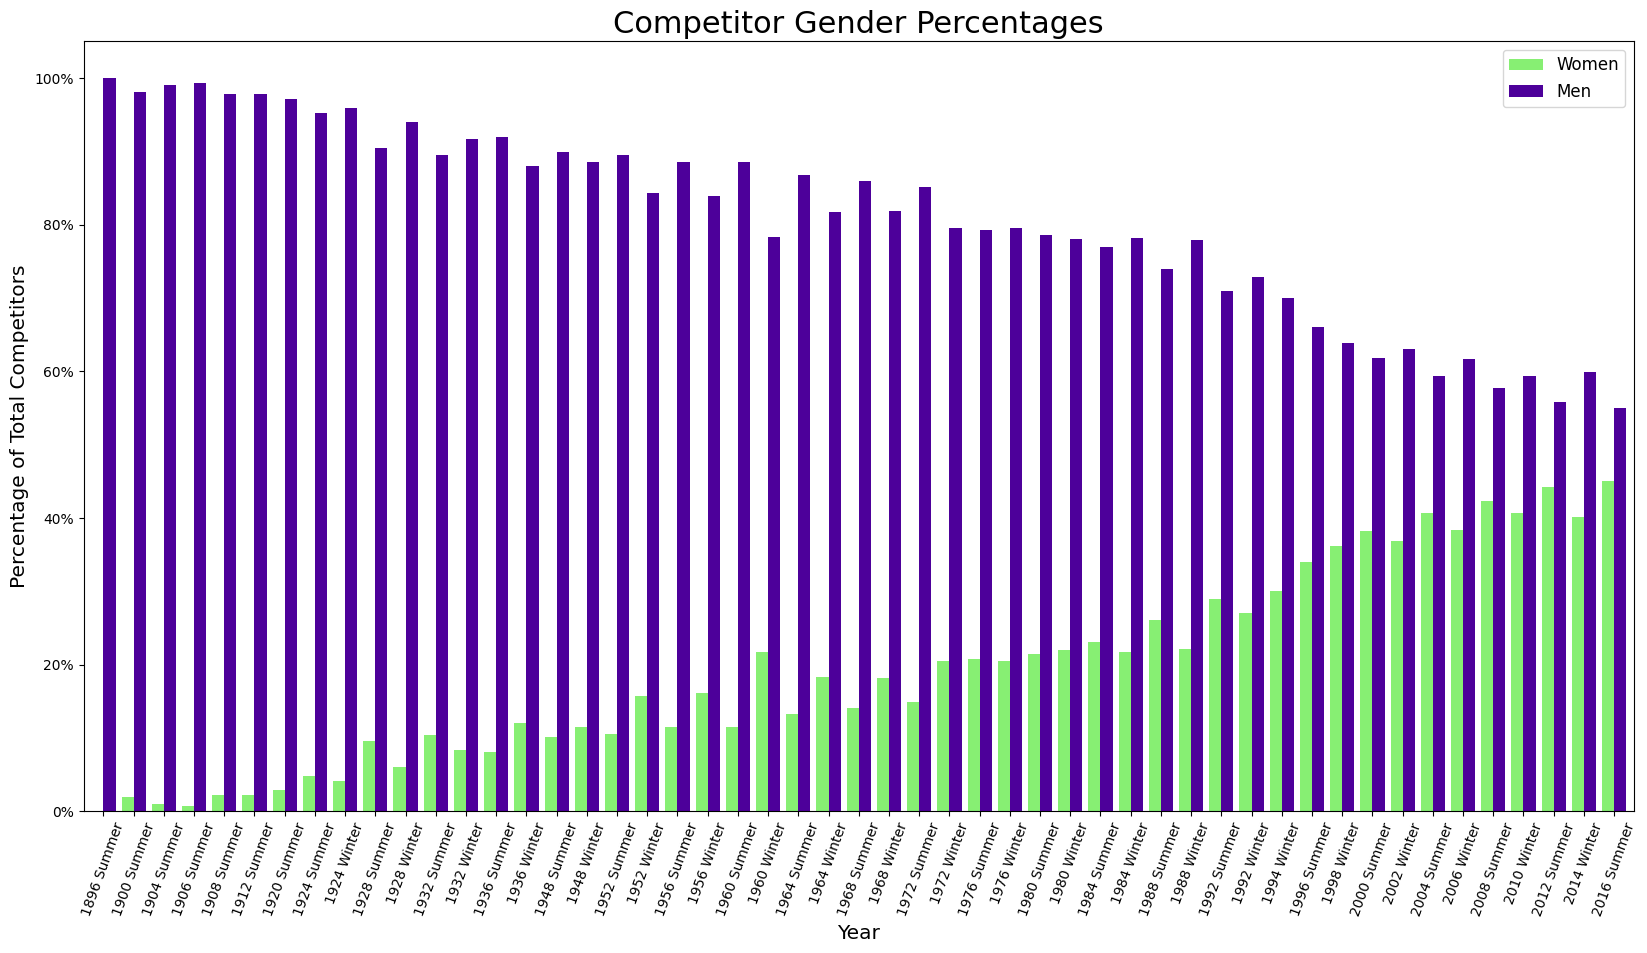

In [38]:
# BAR GRAPH OF Percentage OF COMPETITORS BY GENDER
df_games_pvt.plot.bar(figsize=br['sz'], color=['#87EF73', '#4d009a'], width=.8)
plt.title('Competitor Gender Percentages', fontsize=br['tfnt'])
plt.xlabel(br['xlbl'], fontsize=br['xfnt'])
plt.ylabel('Percentage of Total Competitors', fontsize=br['yfnt'])
plt.xticks(rotation=70, ha='center')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
plt.legend(labels=['Women', 'Men'], fontsize=br['l_font'])
plt.show()

## Summer Percentage of Competitors by Gender by Year

In [39]:
format_dict = {'F%': "{:.1%}", 'M%': "{:.1%}", 'F % Change': "{:+.1%}", 'M % Change': "{:+.1%}",
               'F ratio % change': "{:+.1%}", 'M ratio % change': "{:+.1%}"}

bu_gn = ['#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','#006d2c','#074400']
rv_pu = ['#3f007d', '#54278f', '#6a51a3', '#807dba', '#9e9ac8', '#bcbddc']
grn = ['#003615']

bu_gn = ListedColormap(sns.color_palette(bu_gn).as_hex())
rv_pu = ListedColormap(sns.color_palette(rv_pu).as_hex())
grn = ListedColormap(sns.color_palette(grn).as_hex())

pv_summer_athletes = df_summer.pivot_table(index='Year', columns='Sex', values='Name', aggfunc='nunique', 
                                           fill_value=0)
pv_summer_athletes['Total'] = pv_summer_athletes.sum(axis=1)
pv_summer_athletes['F%'] = pv_summer_athletes['F']/pv_summer_athletes['Total']
pv_summer_athletes['M%'] = pv_summer_athletes['M']/pv_summer_athletes['Total']
pv_summer_athletes['F % Change'] = pv_summer_athletes['F'].pct_change()
pv_summer_athletes['M % Change'] = pv_summer_athletes['M'].pct_change()

### questionable add in
pv_summer_athletes['F ratio % change'] = pv_summer_athletes['F%'].pct_change()
pv_summer_athletes['M ratio % change'] = pv_summer_athletes['M%'].pct_change()

above = pv_summer_athletes['F % Change'].between(0.008,6)
below = pv_summer_athletes['F % Change'] < 0

pv_summer_athletes = pv_summer_athletes.style
pv_summer_athletes = pv_summer_athletes.background_gradient(cmap=grn, subset=pd.IndexSlice[1908, ['F % Change']])
pv_summer_athletes = pv_summer_athletes.background_gradient(cmap=bu_gn, 
                                                            subset=pd.IndexSlice[above, ['F % Change']])
pv_summer_athletes = pv_summer_athletes.background_gradient(cmap=rv_pu, 
                                                            subset=pd.IndexSlice[below, ['F % Change']])
pv_summer_athletes = pv_summer_athletes.format(format_dict)

pv_summer_athletes
##### change in ratio of percentages

## Winter Games Percentage by Gender

In [40]:
pv_winter_athletes = df_winter.pivot_table(index='Year', columns='Sex', values='Name', aggfunc='nunique')
pv_winter_athletes['Total'] = pv_winter_athletes.sum(axis=1)
pv_winter_athletes['F%'] = pv_winter_athletes['F']/pv_winter_athletes['Total']
pv_winter_athletes['M%'] = pv_winter_athletes['M']/pv_winter_athletes['Total']
pv_winter_athletes['F % Change'] = pv_winter_athletes['F'].pct_change()
pv_winter_athletes['M % Change'] = pv_winter_athletes['M'].pct_change()

pv_winter_athletes = pv_winter_athletes.style.format(format_dict)
pv_winter_athletes

# Gender Percentages of Competitors in Mixed-gender Sports Events

## Summer

In [41]:
# dataframe only including events that are agendered
df_no_gender = df_summer[df_summer['Event_gender'] == 'A']

# pivot table for counting the number of competitors in each nongendered game
pv_no_gender = df_no_gender.pivot_table(index='Year', columns='Sex', values='Name', aggfunc='nunique')
pv_no_gender['Total'] = pv_no_gender.sum(axis=1)

# add columns for the percentage of male or female competitors
pv_no_gender['F%'] = pv_no_gender['F']/pv_no_gender['Total']
pv_no_gender['M%'] = pv_no_gender['M']/pv_no_gender['Total']

pv_no_gender = pv_no_gender.style.format(format_dict)
pv_no_gender

## Winter

In [42]:
df_no_gender_w = df_winter[df_winter['Event_gender'] == 'A']

pv_no_gender_w = df_no_gender_w.pivot_table(index='Year', columns='Sex', values='Name', aggfunc='count')
pv_no_gender_w['Total'] = pv_no_gender_w.sum(axis=1)

pv_no_gender_w['F%'] = pv_no_gender_w['F']/pv_no_gender_w['Total']
pv_no_gender_w['M%'] = pv_no_gender_w['M']/pv_no_gender_w['Total']

pv_no_gender_w = pv_no_gender_w.style.format(format_dict)
pv_no_gender_w

# Summer

### Percentage of Competitors by Continent

In [43]:
pv_continent = df_summer.pivot_table(index='Year', columns='Continent', values='Name', aggfunc='count', 
                                     fill_value=0)
pv_continent_pct = pv_continent.apply(lambda x: x/x.sum(), axis=1)

pv_continent_pct = pv_continent_pct.style.format("{:.2%}")

pv_continent_pct

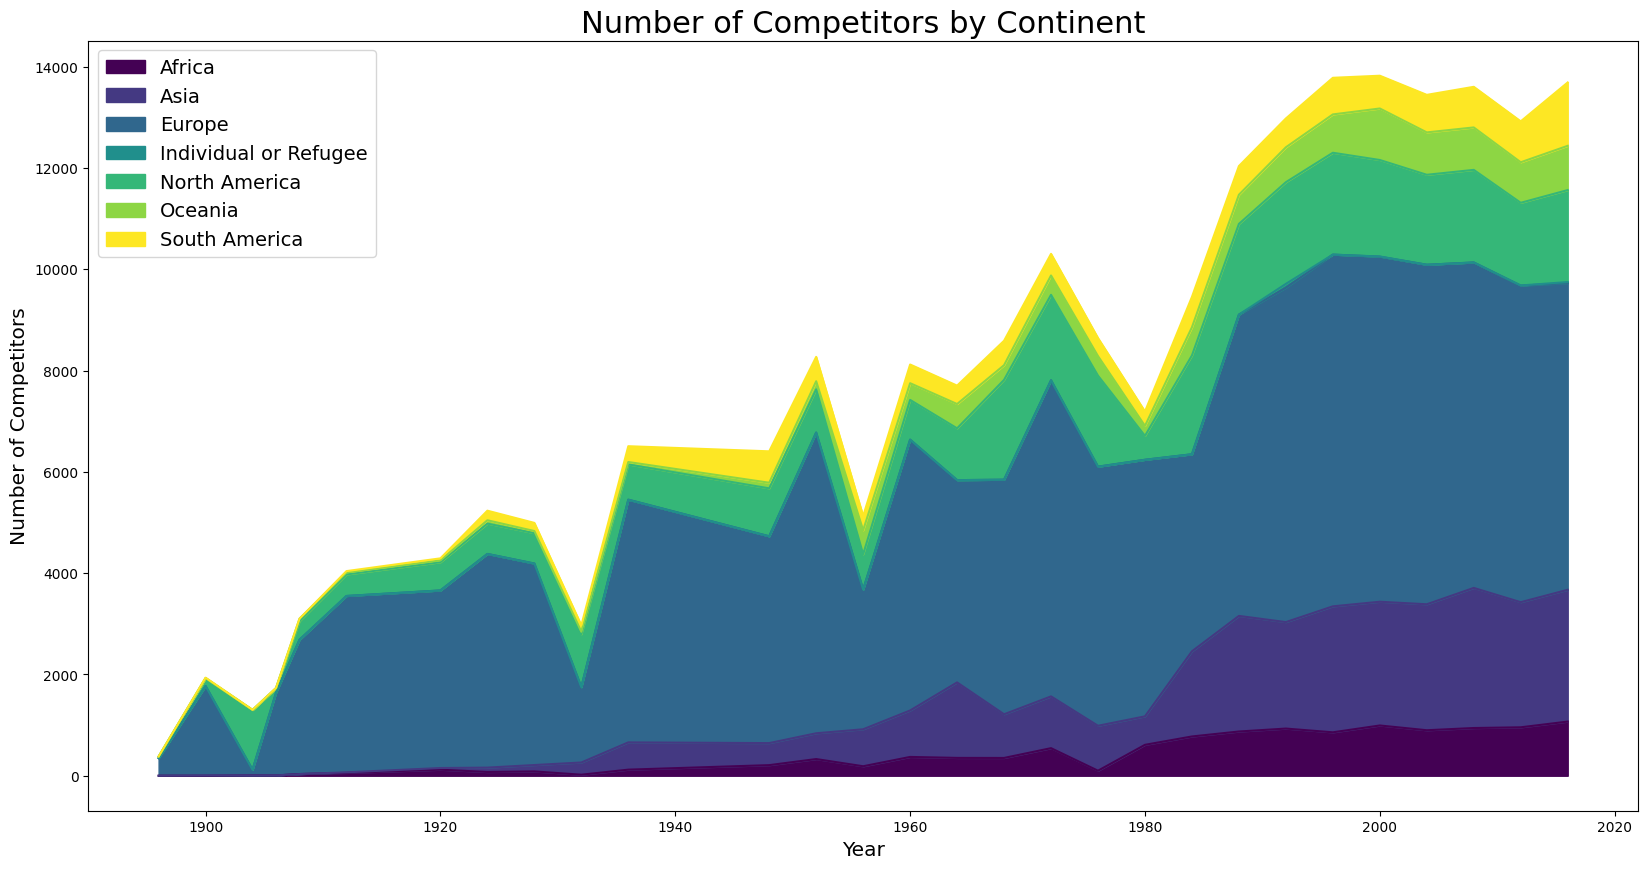

In [44]:
pv_continent.plot.area(figsize=br['sz'], color=viridis(7))
plt.title('Number of Competitors by Continent', fontsize=br['tfnt'])
plt.xlabel(br['xlbl'], fontsize=br['xfnt'])
plt.ylabel('Number of Competitors', fontsize=br['yfnt'])
plt.legend(fontsize=14)
plt.show()

### Percentage of Female Competitors by Continent/Year

In [45]:
pv_mf_ratio = df_summer.pivot_table(index='Year', columns=['Continent', 'Sex'], values='Name', aggfunc='nunique', 
                                    fill_value=0)

cols = list(pv_mf_ratio.columns.levels[0])
perc_cols = []

for col in cols:
    col_perc = '%s %%F' % col
    pv_mf_ratio[col_perc] = pv_mf_ratio[col]['F']/pv_mf_ratio[col].sum(axis=1)
    perc_cols.append(col_perc)

pv_mf_ratio = pv_mf_ratio.style.format("{:.2%}", subset=perc_cols)
pv_mf_ratio

### Percentage of Competitors by Gender/Continent/Sport

In [46]:
df_modern_summer = df_summer[df_summer['Year'] >= 2000]
pv_modern_summer = df_modern_summer.pivot_table(index='Sport', columns=['Continent', 'Sex'], values='Name', 
                                                aggfunc='nunique', fill_value=0)

cont_list = list(pv_modern_summer.columns.levels[0])
pv_modern_summer['Total'] = pv_modern_summer.sum(axis=1)

percent_columns = ['Total %F']
pv_modern_summer['Total %F'] = 0

for cont_name in cont_list:
    cont_perc = '%s %%F' % cont_name
    pv_modern_summer[cont_perc] = pv_modern_summer[cont_name]['F']/pv_modern_summer[cont_name].sum(axis=1)
    percent_columns.append(cont_perc)
    pv_modern_summer['Total %F'] = pv_modern_summer['Total %F'] + pv_modern_summer[cont_name]['F']

pv_modern_summer['Total %F'] = pv_modern_summer['Total %F']/pv_modern_summer['Total']

pv_modern_summer.style.format("{:.2%}", subset=percent_columns)

In [47]:
pv_region = df_modern_summer.pivot_table(index=['Continent', 'Region'], columns=['Year', 'Sex'], values='Name', 
                                         aggfunc='nunique')
pv_region

Year                                              2000           2004         \
Sex                                                  F       M      F      M   
Continent             Region                                                   
Africa                Eastern Africa              68.0   121.0   66.0   98.0   
                      Middle Africa               35.0    52.0   34.0   36.0   
                      Northern Africa             42.0   202.0   52.0  226.0   
                      Southern Africa             44.0   113.0   45.0   86.0   
                      Western Africa              88.0   103.0   77.0   93.0   
Asia                  Central Asia                81.0   179.0   75.0  155.0   
                      East Asia                  463.0   485.0  608.0  507.0   
                      Middle East                 61.0   257.0   70.0  243.0   
                      South Central Asia          41.0   118.0   40.0  124.0   
                      South East Asia             74.0   122.0   68.0   95.0   
Europe                Eastern Europe             657.0  1009.0  727.0  953.0   
                      Northern Europe            375.0   566.0  286.0  495.0   
                      Southern Europe            366.0   827.0  560.0  916.0   
                      Western Europe             504.0   760.0  463.0  732.0   
Individual or Refugee Individual                   1.0     3.0    NaN    NaN   
                      Refugee                      NaN     NaN    NaN    NaN   
North America         Caribbean                  155.0   277.0  138.0  233.0   
                      Central America             40.0   102.0   72.0   98.0   
                      Northern America           399.0   487.0  391.0  414.0   
Oceania               Australia and New Zealand  346.0   418.0  269.0  349.0   
                      Melanesia                    8.0     9.0    8.0    8.0   
                      Micronesia                   8.0    11.0    7.0   12.0   
                      Polynesia                    4.0    10.0    4.0   10.0   
South America         South America              204.0   345.0  228.0  370.0   

Year                                              2008          2012         \
Sex                                                  F      M      F      M   
Continent             Region                                                  
Africa                Eastern Africa              65.0  107.0   75.0  107.0   
                      Middle Africa               31.0   58.0   64.0   45.0   
                      Northern Africa             77.0  167.0   91.0  212.0   
                      Southern Africa             68.0   96.0   64.0   80.0   
                      Western Africa              78.0   98.0   54.0   90.0   
Asia                  Central Asia                96.0  135.0   66.0  140.0   
                      East Asia                  658.0  726.0  572.0  500.0   
                      Middle East                 90.0  242.0  150.0  249.0   
                      South Central Asia          41.0  118.0   45.0  138.0   
                      South East Asia             80.0   91.0   80.0   80.0   
Europe                Eastern Europe             784.0  908.0  723.0  825.0   
                      Northern Europe            395.0  504.0  518.0  606.0   
                      Southern Europe            426.0  723.0  447.0  645.0   
                      Western Europe             490.0  743.0  500.0  677.0   
Individual or Refugee Individual                   NaN    NaN    1.0    3.0   
                      Refugee                      NaN    NaN    NaN    NaN   
North America         Caribbean                  135.0  231.0  125.0  186.0   
                      Central America             60.0   94.0   61.0  120.0   
                      Northern America           432.0  494.0  425.0  385.0   
Oceania               Australia and New Zealand  281.0  329.0  266.0  317.0   
                      

# Winter

### Percentage of Competitors by Continent

In [48]:
pv_cont_w = df_winter.pivot_table(index='Year', columns='Continent', values='Name', aggfunc='nunique', 
                                  fill_value=0)

pv_cont_w = pv_cont_w.apply(lambda x: x/x.sum(), axis=1)

pv_cont_w.style.format("{:.2%}")

### Percentage of Competitors that are female by Continent/Year

In [49]:
pv_mf_ratio_w = df_winter.pivot_table(index='Year', columns=['Continent', 'Sex'], values='Name', 
                                      aggfunc='nunique', fill_value=0)

pv_mf_ratio_w['Individual or Refugee', 'F'] = 0
cols = list(pv_mf_ratio_w.columns.levels[0])
perc_cols = []

for col in cols:
    col_perc = '%s %%F' % col
    pv_mf_ratio_w[col_perc] = pv_mf_ratio_w[col]['F']/pv_mf_ratio_w[col].sum(axis=1)
    perc_cols.append(col_perc)

pv_mf_ratio_w = pv_mf_ratio_w.style.format("{:.2%}", subset=perc_cols)
pv_mf_ratio_w

### Percentage of Competitors by Gender/Continent/Sport

In [50]:
df_modern_winter = df_winter[df_winter['Year'] >= 2000]
pv_modern_winter = df_modern_winter.pivot_table(index='Sport', columns=['Continent', 'Sex'], values='Name', 
                                                aggfunc='nunique', fill_value=0)

conts = list(pv_modern_winter.columns.levels[0])


pv_modern_winter['Individual or Refugee', 'F'] = 0
pv_modern_winter['Total'] = pv_modern_winter.sum(axis=1)

pv_modern_winter['Total %F'] = 0
perc_conts = ['Total %F']


for cont in conts:
    cont_perc = '%s %%F' % cont
    pv_modern_winter[cont_perc] = pv_modern_winter[cont]['F']/pv_modern_winter[cont].sum(axis=1)
    perc_conts.append(cont_perc)
    pv_modern_winter['Total %F'] = pv_modern_winter['Total %F'] + pv_modern_winter[cont]['F']

pv_modern_winter['Total %F'] = pv_modern_winter['Total %F']/pv_modern_winter['Total']

pv_modern_winter.style.format("{:.2%}", subset=perc_conts)

In [51]:
#separate gymnastics dataframes by gender
gymnasts = df_summer["Sport"].str.contains("Gymnastics")
women_only = df_summer["Sex"].str.contains("F")
men_only = df_summer["Sex"].str.contains("M")

nt_null_age = df_summer["Age"].notnull()
nt_null_bmi = df_summer["BMI"].notnull()
nt_zero = df_summer["Age"]>0

df_gymnast_women = df_summer[gymnasts & women_only & nt_null_age & nt_null_bmi & nt_zero]
df_gymnast_men = df_summer[gymnasts & men_only & nt_null_age & nt_null_bmi & nt_zero]

<Axes: title={'center': 'Men'}, xlabel='Age', ylabel='BMI'>

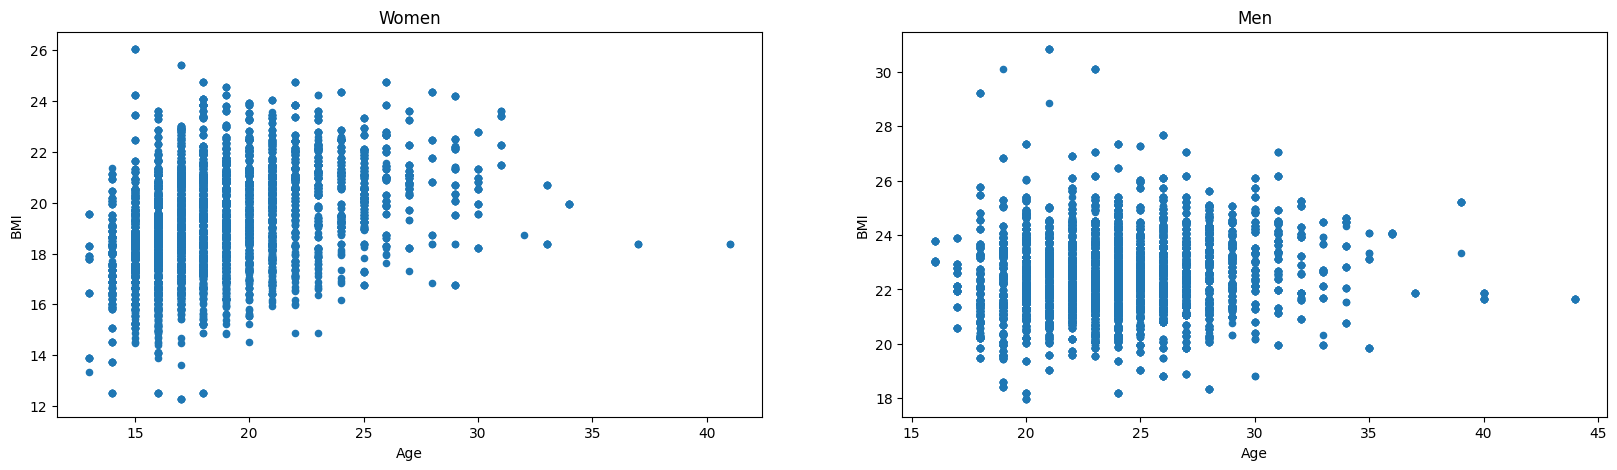

In [52]:
#scatter plot of Age/BMI in Gymnastics
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
df_gymnast_women.plot.scatter(title="Women", x="Age", y="BMI", ax=ax1)
df_gymnast_men.plot.scatter(title="Men", x="Age", y="BMI", ax=ax2)

In [53]:
X = df_gymnast_women["Age"]
y = df_gymnast_women["BMI"]
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    BMI   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          2.738e+05
Date:                Wed, 25 Oct 2023   Prob (F-statistic):                        0.00
Time:                        18:54:46   Log-Likelihood:                         -21434.
No. Observations:                8190   AIC:                                  4.287e+04
Df Residuals:                    8189   BIC:                                  4.288e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            1.0060      0.002    523.276      0.000       1.002       1.010
==============================================================================
Omnibus:                     1369.300   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3023.319
Skew:                          -0.975   Prob(JB):                         0.00
Kurtosis:                       5.248   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
X = scipy.stats.zscore(df_gymnast_women["Age"])
y = scipy.stats.zscore(df_gymnast_women["BMI"])
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    BMI   R-squared (uncentered):                   0.155
Model:                            OLS   Adj. R-squared (uncentered):              0.154
Method:                 Least Squares   F-statistic:                              1497.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):                   5.68e-301
Time:                        18:54:46   Log-Likelihood:                         -10933.
No. Observations:                8190   AIC:                                  2.187e+04
Df Residuals:                    8189   BIC:                                  2.188e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.3932      0.010     38.695      0.000       0.373       0.413
==============================================================================
Omnibus:                       49.837   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.154
Skew:                           0.104   Prob(JB):                     1.93e-14
Kurtosis:                       3.377   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
X = df_gymnast_women["Age"]
y = df_gymnast_women["BMI"]

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    BMI   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          2.738e+05
Date:                Wed, 25 Oct 2023   Prob (F-statistic):                        0.00
Time:                        18:54:46   Log-Likelihood:                         -21434.
No. Observations:                8190   AIC:                                  4.287e+04
Df Residuals:                    8189   BIC:                                  4.288e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            1.0060      0.002    523.276      0.000       1.002       1.010
==============================================================================
Omnibus:                     1369.300   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3023.319
Skew:                          -0.975   Prob(JB):                         0.00
Kurtosis:                       5.248   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# predictions

In [56]:
X = df_gymnast_men["Age"]
y = df_gymnast_men["BMI"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    BMI   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          4.430e+05
Date:                Wed, 25 Oct 2023   Prob (F-statistic):                        0.00
Time:                        18:54:46   Log-Likelihood:                         -28468.
No. Observations:               10696   AIC:                                  5.694e+04
Df Residuals:                   10695   BIC:                                  5.695e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.9271      0.001    665.594      0.000       0.924       0.930
==============================================================================
Omnibus:                      852.760   Durbin-Watson:                   0.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1596.316
Skew:                          -0.561   Prob(JB):                         0.00
Kurtosis:                       4.524   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***

# New Experiments

## Medal Analysis

'Team' is often just the country name, but multiple teams from the same country can compete in the same event (like archery teams, or tennis doubles).
In those cases this distinction is indicated by adding a number to the end of the country name or naming the team outright.

I'm making the assumption that if multiple individuals on the same team win the gold medal in the same event, it's a team played event (and they are only one entity
in terms of the competition).

Occasionally 2 people on the same team will win the gold medal in the same event (like both on the US gymnastics team, for instance),
but were competing individually.
To remove 1 off exceptions like above, I subtract the number of years that multiple individuals on the same team won gold 
from the number of years the event was held. If this number is less than 2, then it's a team sport

In [57]:
df_olymp['Ind_or_team'] = 'individual'

# This counts the number of individuals that had the same medal/event/games/team
# 'Year' is technically redundant but is included in the groupby bc sometimes 2 teams will both win the gold 
# medal in that event the same year and we want the multiple_players groupby to be able to count the number of 
# unique years that occured

# groupby counts the number of individuals that won a gold medal for each event/year
gld_medal = df_olymp['Medal']=='Gold'
grp_medals = df_olymp.loc[gld_medal].groupby(['Event', 'Medal_key', 'Year'])[['Name']].nunique().reset_index()

# groupby that counts the number of years that multiple people won the gold medal 
multiple_players = grp_medals[grp_medals['Name']>1].groupby('Event')[['Year']].nunique()
multiple_players.rename(columns={'Year': 'Years_multiple_players'}, inplace=True)

# groupby that counts the number of total years the event has been held
event_held = df_olymp.groupby('Event')[['Year']].nunique().rename(columns={'Year': 'Total_years'})

# merges the 2 groupbys and subtracts the total years the 
grp_years = pd.merge(multiple_players, event_held, on='Event')
grp_years = grp_years.loc[~(grp_years['Total_years']-grp_years['Years_multiple_players']>1)]

team_sports = list(grp_years.index)
df_olymp.loc[df_olymp['Event'].isin(team_sports), ['Ind_or_team']] = 'team'


df_olymp['temp_name'] = df_olymp['Name']
# setting the temp_name to blank for people on teams
df_olymp.loc[df_olymp['Ind_or_team']=='team', 'temp_name'] = ''
# each person on a team will have the same competitor_key for team sports, for individual sports each individual
#has a different competitor_key
df_olymp['Competitor_key'] = (df_olymp['Country'] + df_olymp['Games'] + df_olymp['Event'] 
                              + df_olymp['Team'] + df_olymp['temp_name'])

df_olymp.drop(columns=['temp_name'], inplace=True)

In [58]:
# Gold medals per competitor by country
grp_country = df_olymp.loc[df_olymp['Year']==2008].groupby(['Region', 'Country'])[['Event',
                                                                                   'Competitor_key',
                                                                                   'Name', 
                                                                                   'Medal_key']].nunique()
grp_country['Wins_per_competitor'] = grp_country['Medal_key']/grp_country['Competitor_key']
grp_country

Event  \
Region                    Country                                   
Australia and New Zealand Australia                           219   
                          New Zealand                          78   
Caribbean                 Antigua                               5   
                          Aruba                                 2   
                          Bahamas                              22   
                          Barbados                             10   
                          Cayman Islands                        6   
                          Cuba                                102   
                          Curacao                               4   
                          Dominica                              2   
                          Dominican Republic                   21   
                          Grenada                               8   
                          Haiti                                 7   
                          Jamaica                              29   
                          Puerto Rico                          31   
                          Saint Kitts                           5   
                          Saint Lucia                           4   
                          Saint Vincent                         2   
                          Trinidad                             19   
                          Virgin Islands, British               2   
                          Virgin Islands, US                    8   
Central America           Belize                                4   
                          Costa Rica                            8   
                          El Salvador                          14   
                          Guatemala                            12   
                          Honduras                              8   
                          Mexico                               73   
                          Nicaragua                             7   
                          Panama                                5   
Central Asia              Kazakhstan                          106   
                          Kyrgyzstan                           22   
                          Tajikistan                           16   
                          Turkmenistan                          9   
                          Uzbekistan                           67   
East Asia                 China                               259   
                          Japan                               176   
                          Mongolia                             29   
                          North Korea                          38   
                          South Korea                         142   
                          Taiwan                               41   
Eastern Africa            Burundi                               3   
                          Comoros                               3   
                          Djibouti                              2   
                          Eritrea                               6   
                          Ethiopia                             10   
                          Kenya                                24   
                          Madagascar                            6   
                          Malawi                                4   
                          Mauritius                            11   
                          Mozambique                            4   
                          Rwanda                                4   
                          Seychelles                            9   
                          Somalia                               2   
                          Tanzania                              6   
                          Uganda                               10   
                          Zambia                                8   
                          Zimbabwe                        

In [59]:
# most gold medals won by a single person
gld_medal = df_olymp['Medal']=='Gold'
after_1947 = df_olymp['Year']>1947
summer = df_olymp['Games'].str.contains('Summer')

df_summer = df_olymp.loc[after_1947 & summer]
                                         
grp_people = df_summer.loc[gld_medal].groupby(['Name', 'Sport'])[['Medal_key']].nunique()
grp_people.sort_values('Medal_key', ascending=False).head(20)

Medal_key
Name                                            Sport                   
Michael Fred Phelps, II                         Swimming              23
Mark Andrew Spitz                               Swimming               9
Frederick Carlton "Carl" Lewis                  Athletics              9
Larysa Semenivna Latynina (Diriy-)              Gymnastics             9
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik) Swimming               8
Matthew Nicholas "Matt" Biondi                  Swimming               8
Sawao Kato                                      Gymnastics             8
Birgit Fischer-Schmidt                          Canoeing               8
Usain St. Leo Bolt                              Athletics              8
Nikolay Yefimovich Andrianov                    Gymnastics             7
Borys Anfiyanovych Shakhlin                     Gymnastics             7
Donald Arthur "Don" Schollander                 Swimming               7
Vra slavsk (-Odloilov)                          Gymnastics             7
Viktor Ivanovych Chukarin                       Gymnastics             7
Maria Valentina Vezzali                         Fencing                6
Gert Fridolf Fredriksson                        Canoeing               6
Isabelle Regina Werth                           Equestrianism          6
Reiner Klimke                                   Equestrianism          6
Christopher Andrew "Chris" Hoy                  Cycling                6
Akinori Nakayama                                Gymnastics             6

In [60]:
yr_2008 = df_summer['Year']==2008
yes_medal = df_summer['Medal'].notnull()
df_summer_2008 = df_summer.loc[yr_2008]

# number of events that someone from that region received a medal in:
pv_won_events_2008 = df_summer_2008.loc[yes_medal].pivot_table(index='Region', columns='Sport', values='Event', 
                                                               aggfunc='nunique', fill_value=0)
# number of events in that sport in which someone from that region competed:
pv_events_2008 = df_summer_2008.pivot_table(index='Region', columns='Sport', values='Event', aggfunc='nunique')

In [61]:
# the proportion of participated events that someone medaled
pv_won_events_2008.div(pv_events_2008)

Sport                       Archery  Athletics  Badminton  Baseball  \
Region                                                                
Australia and New Zealand  0.000000   0.214286        0.0       NaN   
Caribbean                  0.000000   0.428571        NaN       1.0   
Central America            0.000000   0.047619        0.0       NaN   
Central Asia               0.000000   0.000000        NaN       NaN   
East Asia                  1.000000   0.071429        1.0       1.0   
Eastern Africa             0.000000   0.545455        0.0       NaN   
Eastern Europe             0.250000   0.500000        0.0       NaN   
Melanesia                       NaN        NaN        NaN       NaN   
Micronesia                      NaN        NaN        NaN       NaN   
Middle Africa                   NaN   0.090909        NaN       NaN   
Middle East                0.000000   0.030303        NaN       NaN   
Northern Africa            0.000000   0.120000        0.0       NaN   
Northern America           0.000000   0.361702        0.0       1.0   
Northern Europe            0.000000   0.186047        0.0       NaN   
Polynesia                       NaN        NaN        NaN       NaN   
South America              0.000000   0.076923        0.0       NaN   
South Central Asia         0.000000   0.000000        0.0       NaN   
South East Asia            0.000000   0.000000        0.8       NaN   
Southern Africa            0.000000   0.052632        0.0       NaN   
Southern Europe            0.250000   0.130435        0.0       NaN   
Western Africa                  NaN   0.086957        0.0       NaN   
Western Europe             0.333333   0.121951        0.0       0.0   

Sport                      Basketball  Beach Volleyball    Boxing  Canoeing  \
Region                                                                        
Australia and New Zealand         0.5               0.0  0.000000  0.357143   
Caribbean                         NaN               0.0  0.727273  0.000000   
Central America                   NaN               0.0  0.000000  0.000000   
Central Asia                      NaN               NaN  0.200000  0.000000   
East Asia                         0.0               0.5  0.454545  0.066667   
Eastern Africa                    NaN               NaN  0.125000  0.000000   
Eastern Europe                    0.5               0.0  0.545455  0.750000   
Melanesia                         NaN               NaN       NaN       NaN   
Micronesia                        NaN               NaN       NaN       NaN   
Middle Africa                     0.0               0.0  0.000000  0.000000   
Middle East                       NaN               0.0  0.250000  0.000000   
Northern Africa                   NaN               NaN  0.000000       NaN   
Northern America                  1.0               1.0  0.125000  0.125000   
Northern Europe                   0.0               0.0  0.500000  0.333333   
Polynesia                         NaN               NaN       NaN       NaN   
South America                     0.5               0.5  0.000000  0.000000   
South Central Asia                0.0               NaN  0.142857       NaN   
South East Asia                   NaN               NaN  0.250000  0.000000   
Southern Africa                   NaN               0.0  0.000000  0.000000   
Southern Europe                   0.5               0.0  0.333333  0.357143   
Western Africa                    0.0               NaN  0.000000  0.250000   
Western Europe                    0.0               0.0  0.333333  0.625000   

Sport                       Cycling    Diving  Equestrianism   Fencing  \
Region                                                                   
Australia and New Zealand  0.166667  0.250000       0.166667  0.000000   
Caribbean                  0.250000  0.000000       0.000000  0.000000   
Central America            0.000000  0.200000       0.000000  0.000000   
Central Asia               0

In [62]:
# number of US competitors (teams count as 1) in various sports over time
only_us = df_summer['Country'] == 'USA'
us_competitors = df_summer.loc[only_us].pivot_table(index='Year', columns='Sport', values='Competitor_key', 
                                                    aggfunc='nunique', fill_value=0)
years = list(us_competitors.index)

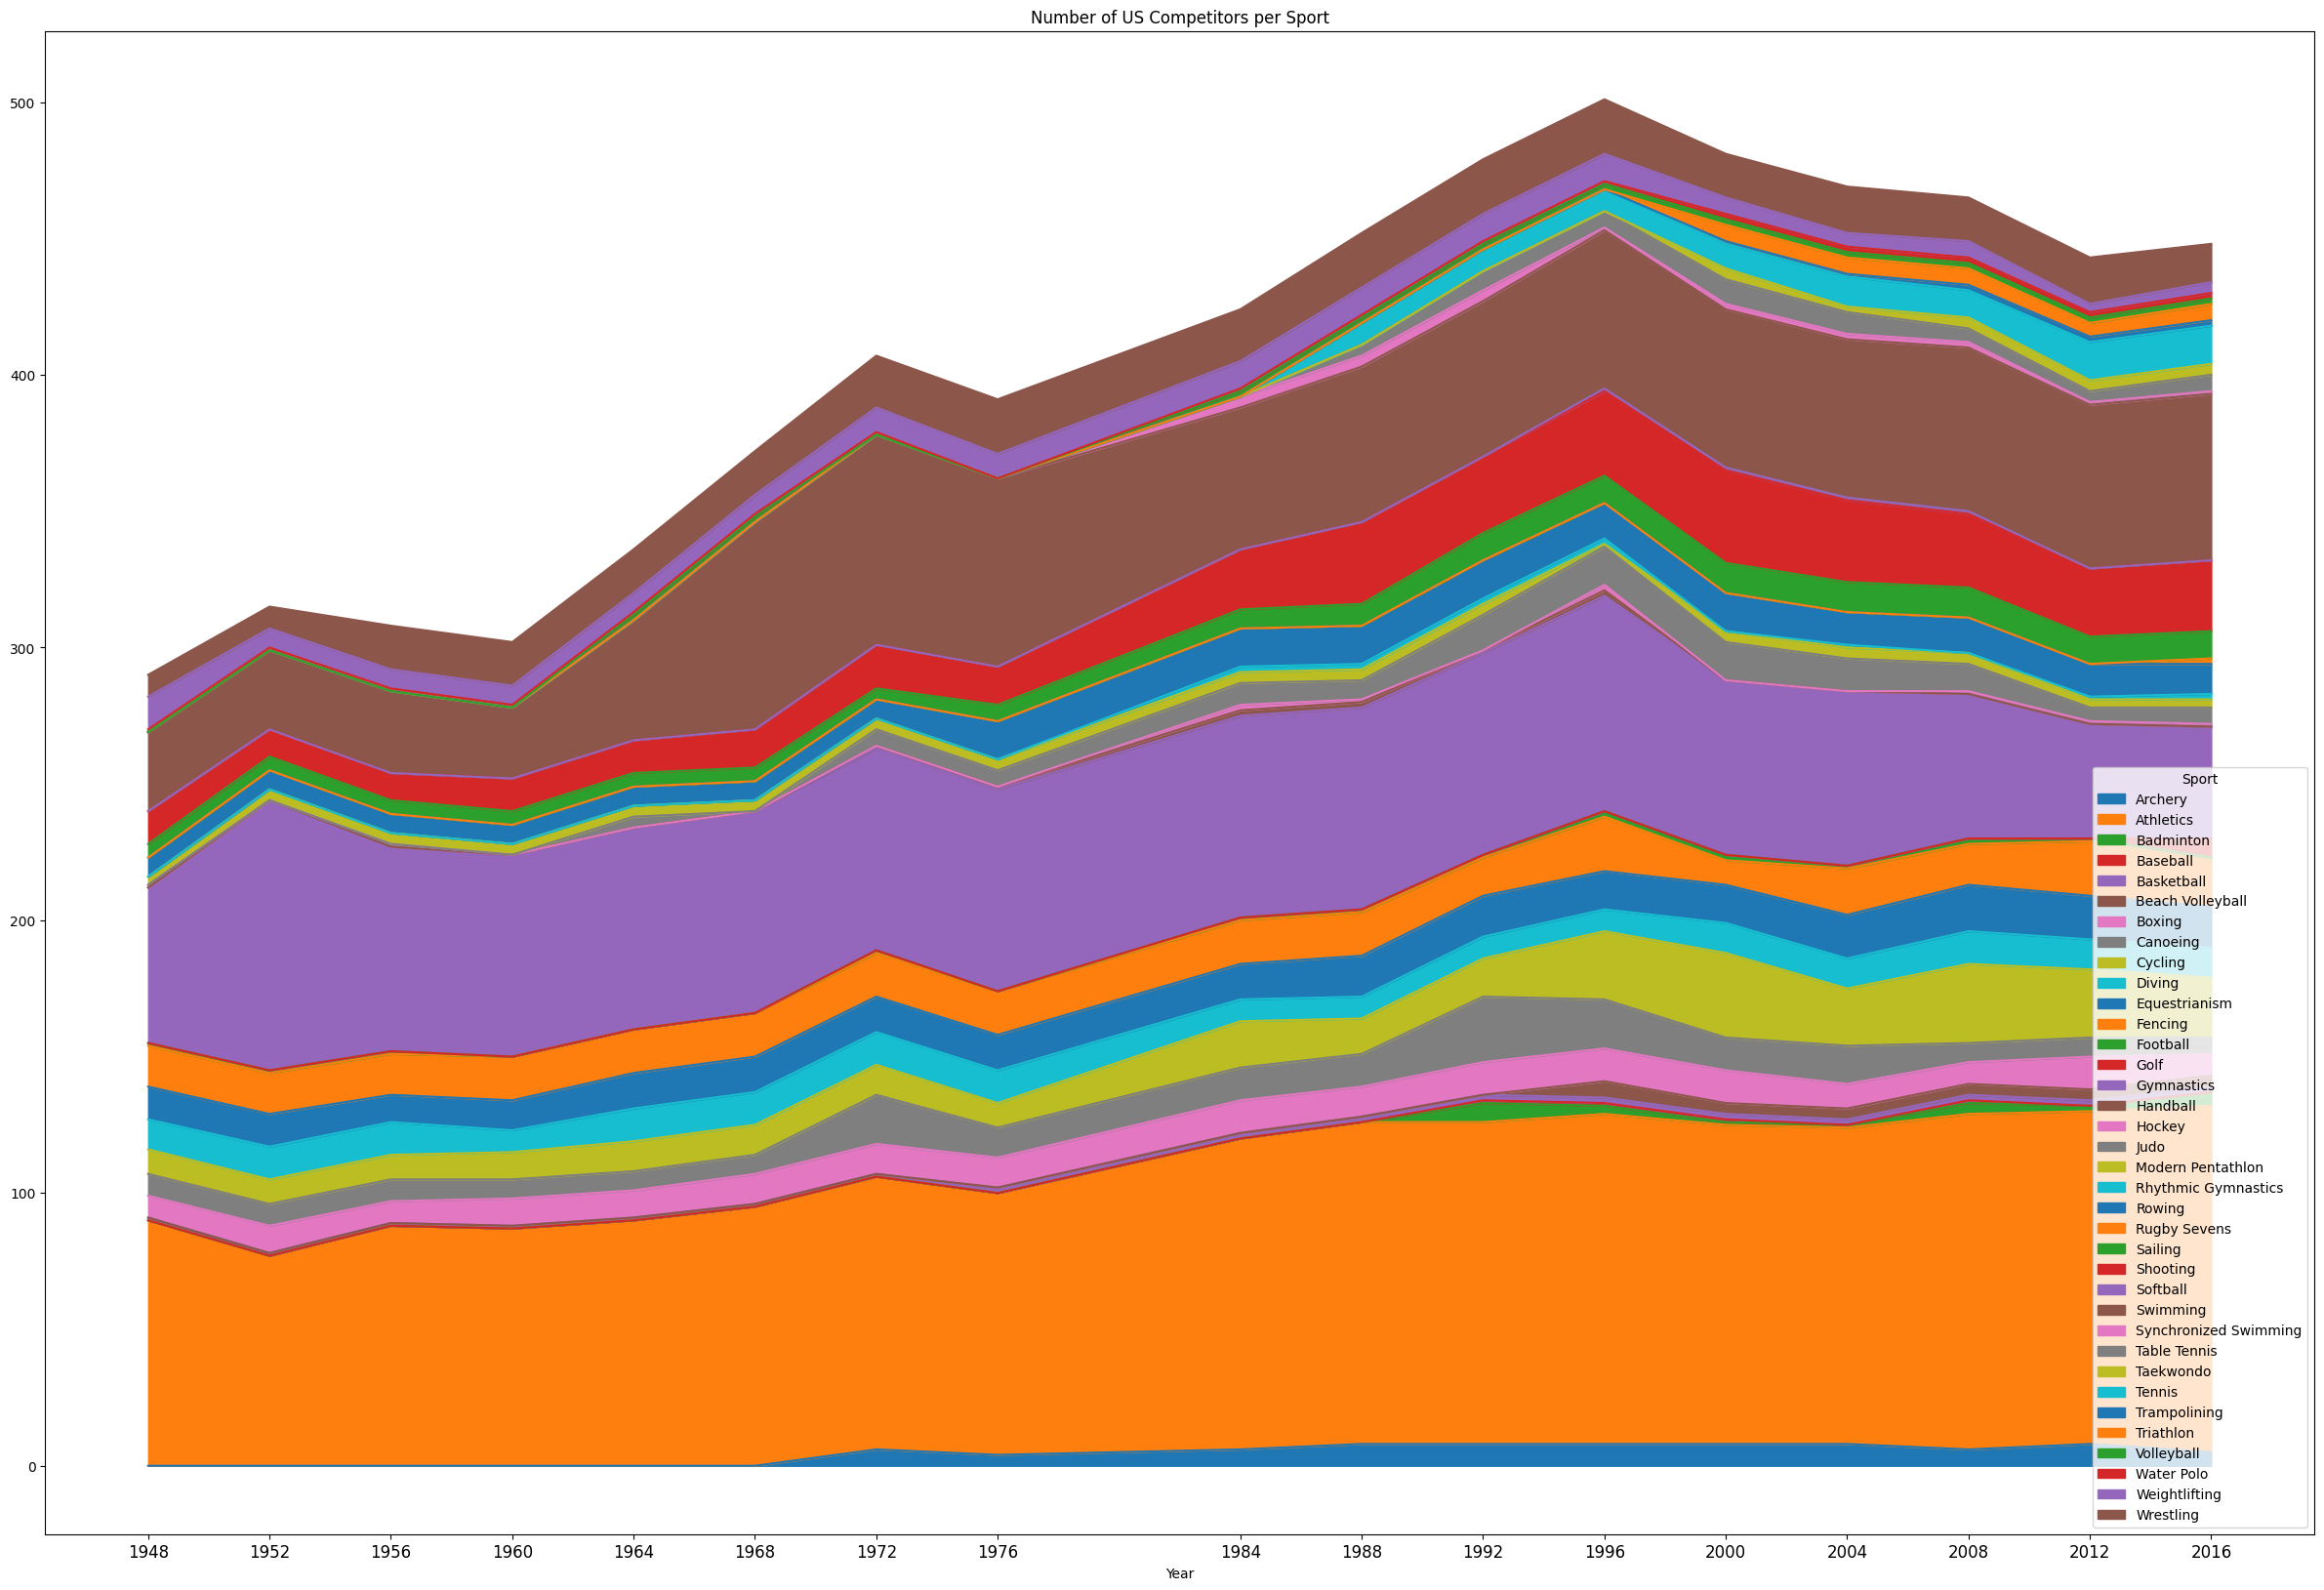

In [63]:
us_competitors.plot.area(figsize=(30,20))
plt.xticks(years, fontsize=12)
plt.title("Number of US Competitors per Sport")
plt.show()

In [64]:
# Total number of competitors (teams count as 1) in specific sports over time 
all_competitors = df_summer.pivot_table(index='Year', columns='Sport', values='Competitor_key',
                                        aggfunc='nunique', fill_value=0)

In [65]:
rainbow = ['#a80000', '#db4d00', '#f0a315', '#fff108', '#6caf00', '#00755c', '#00a3af', '#0052af', '#3700af', 
           '#8000af',  '#ff0c0c', '#ff7931', '#f4be58', '#fff651', '#a3ff10', '#00e7b5', '#10efff', '#1080ff', 
           '#5c10ff', '#bf10ff']

The olympics were held in Australia in 1956 (the first time they were held outside of Europe), which led to a decline in attendance from South American and European athletes***FACT CHECK

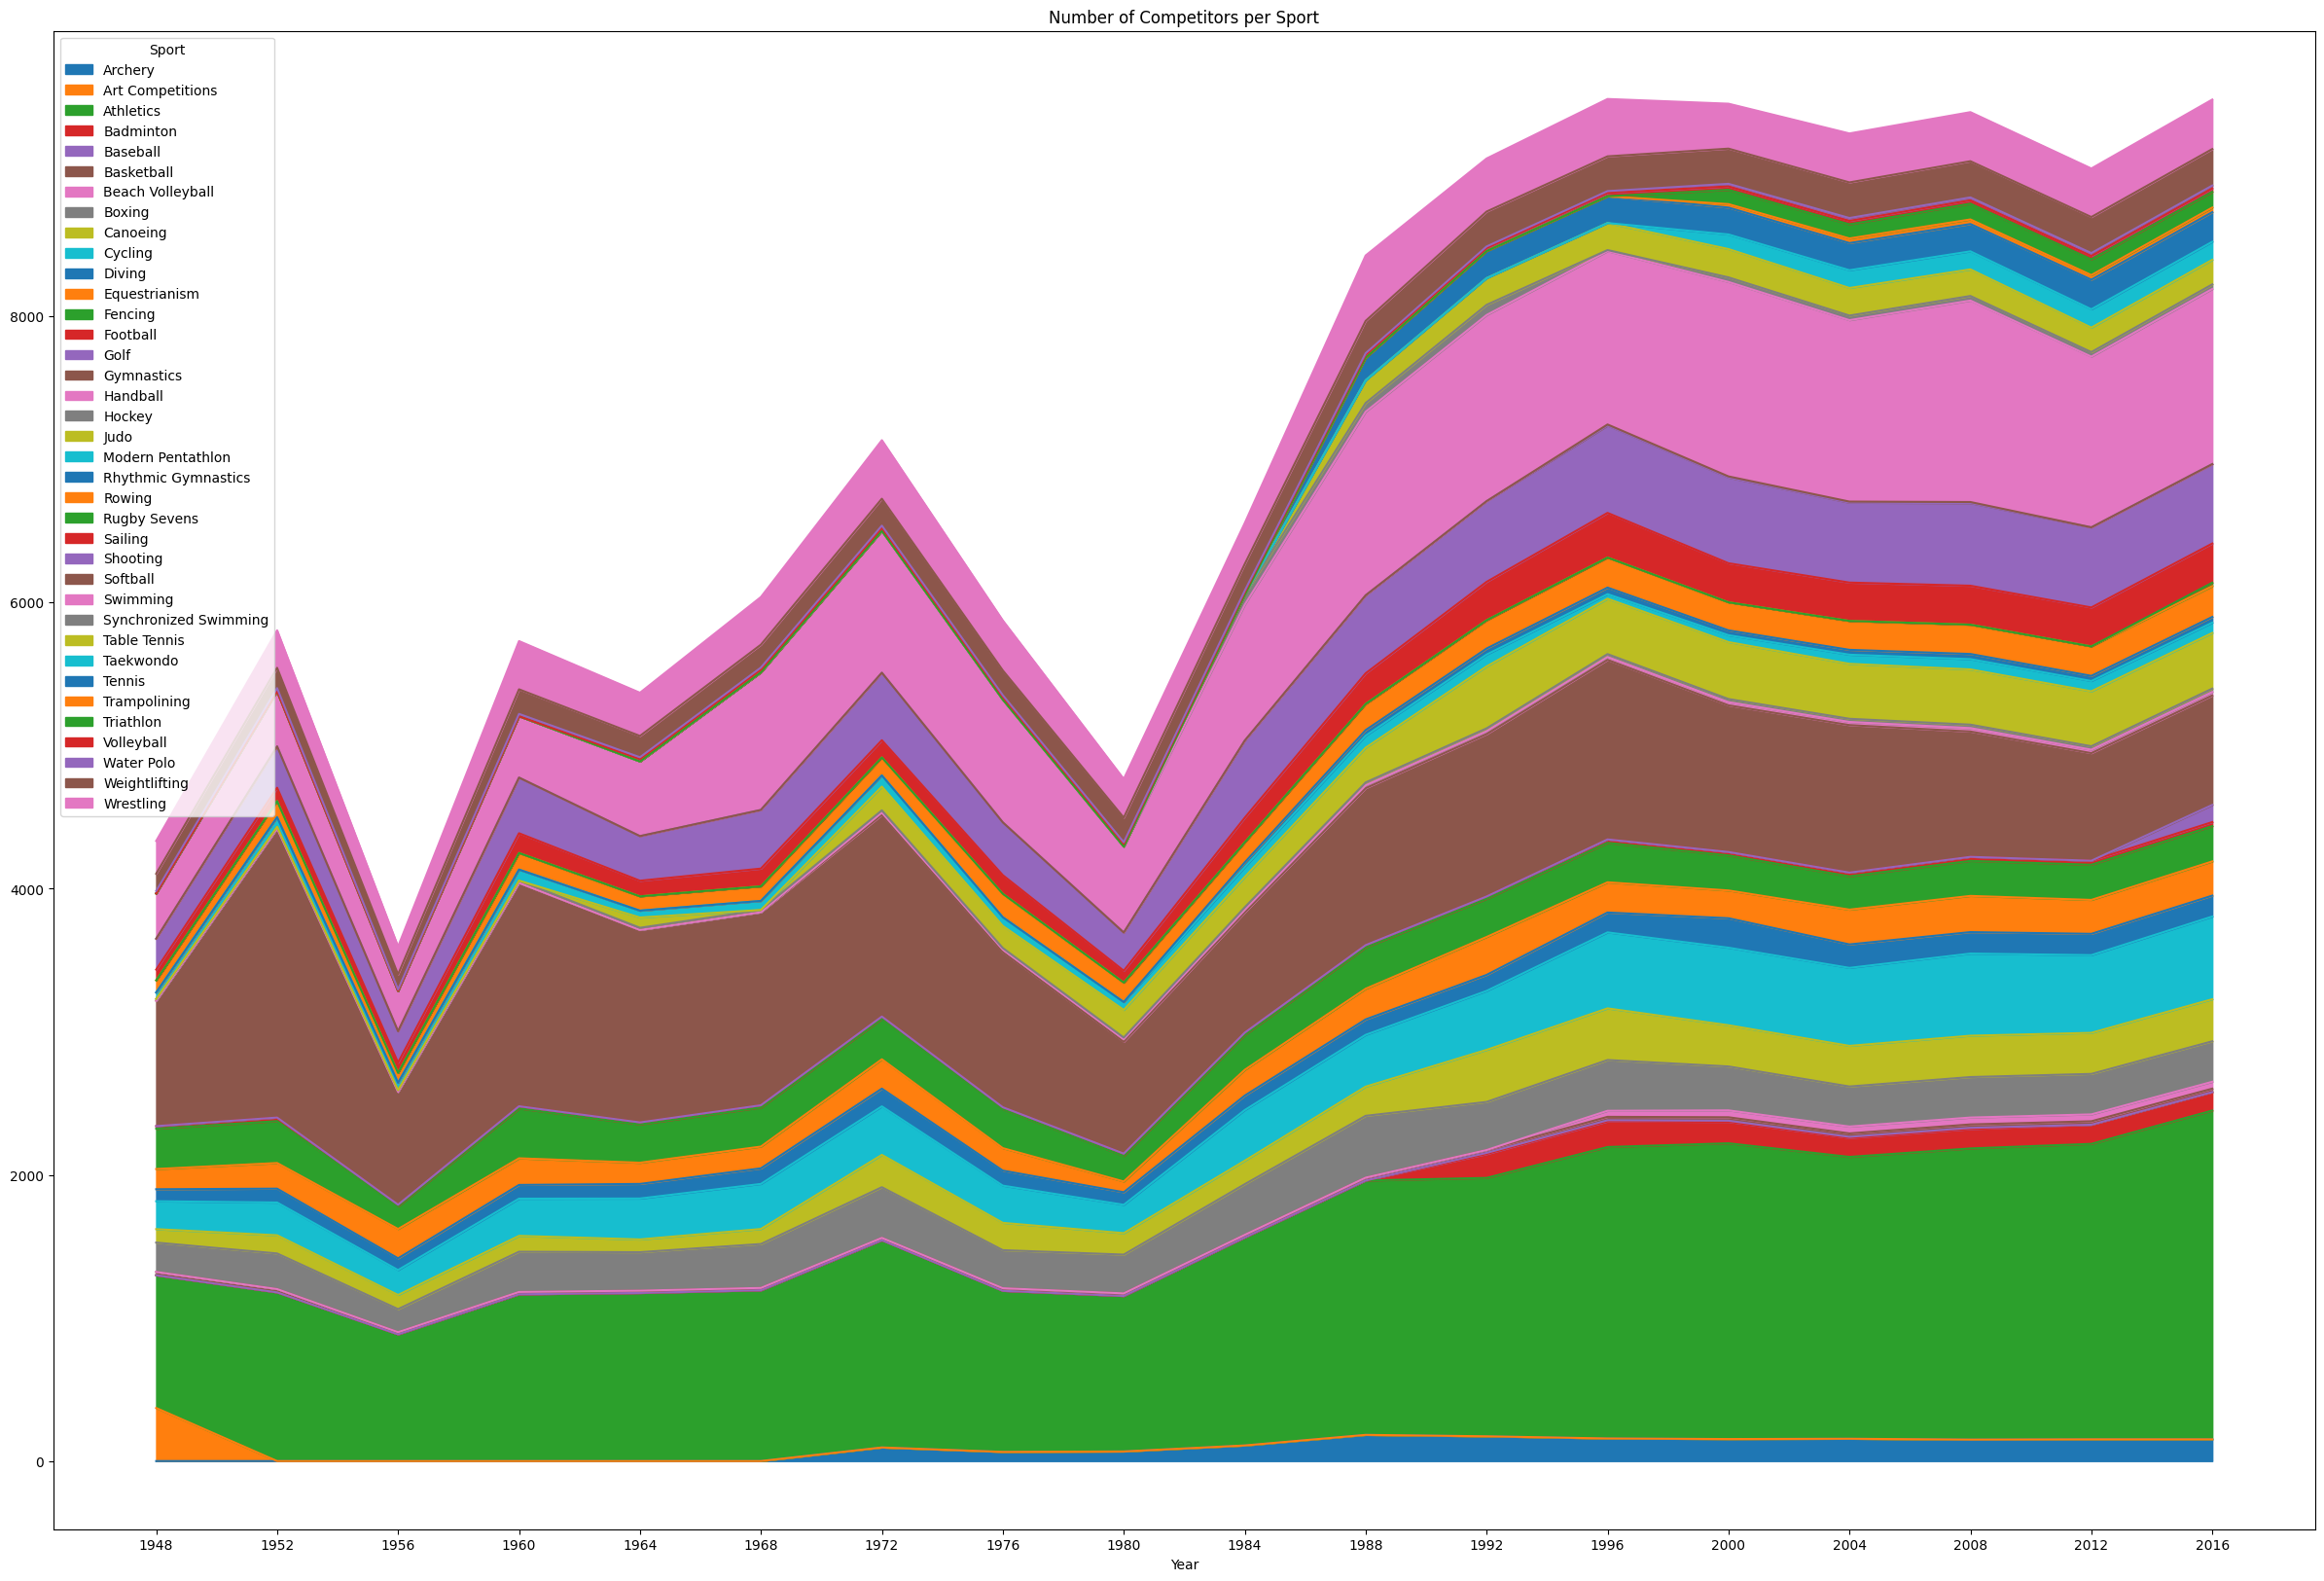

In [66]:
all_competitors.plot.area(figsize=(30,20))
plt.title('Number of Competitors per Sport')
plt.xticks(list(all_competitors.index))
plt.show()

In [67]:
# Number of competitors from each country per year of the summer olympics
cntry_competitors = df_summer.pivot_table(index='Year', columns='Country', values='Competitor_key', 
                                          aggfunc='nunique', fill_value=0)

In [68]:
# Total number of Events in specific sports over time 
all_events = df_summer.pivot_table(index='Year', columns='Sport', values='Event', aggfunc='nunique', 
                                   fill_value=0)

In [69]:
# average number of competitors per event
all_competitors.div(all_events)

Sport  Archery  Art Competitions  Athletics  Badminton  Baseball  Basketball  \
Year                                                                           
1948       NaN         20.611111  28.121212        NaN       NaN        23.0   
1952       NaN               NaN  35.727273        NaN       NaN        23.0   
1956       NaN               NaN  26.848485        NaN       NaN        15.0   
1960       NaN               NaN  34.294118        NaN       NaN        16.0   
1964       NaN               NaN  32.638889        NaN       NaN        16.0   
1968       NaN               NaN  33.166667        NaN       NaN        16.0   
1972     47.50               NaN  38.131579        NaN       NaN        16.0   
1976     32.00               NaN  30.432432        NaN       NaN         9.0   
1980     33.50               NaN  28.605263        NaN       NaN         9.0   
1984     54.50               NaN  35.463415        NaN       NaN         9.0   
1988     45.75               NaN  42.333333        NaN       NaN        10.0   
1992     43.25               NaN  42.000000      41.75       8.0        10.0   
1996     39.50               NaN  46.295455      35.80       8.0        12.0   
2000     38.50               NaN  44.934783      30.00       8.0        12.0   
2004     39.00               NaN  42.826087      26.40       8.0        12.0   
2008     37.50               NaN  43.297872      27.20       8.0        12.0   
2012     38.00               NaN  43.936170      26.80       NaN        12.0   
2016     38.00               NaN  48.893617      25.80       NaN        12.0   

Sport  Beach Volleyball     Boxing   Canoeing    Cycling  Diving  \
Year                                                               
1948                NaN  25.625000  10.444444  32.500000  21.000   
1952                NaN  24.900000  14.111111  38.166667  24.250   
1956                NaN  16.100000  11.000000  29.000000  20.500   
1960                NaN  28.100000  15.857143  43.333333  24.000   
1964                NaN  26.900000  12.714286  40.857143  25.500   
1968                NaN  27.909091  15.000000  45.000000  27.250   
1972                NaN  32.181818  20.545455  48.428571  31.000   
1976                NaN  24.181818  17.363636  43.333333  26.250   
1980                NaN  24.636364  13.636364  33.000000  22.000   
1984                NaN  29.500000  13.666667  44.250000  25.250   
1988                NaN  36.000000  17.000000  40.222222  27.000   
1992                NaN  28.000000  22.750000  41.200000  28.000   
1996               21.0  29.583333  22.562500  37.928571  34.750   
2000               24.0  25.583333  18.000000  30.111111  25.750   
2004               24.0  25.454545  17.750000  30.277778  20.500   
2008               24.0  25.727273  18.062500  31.888889  18.750   
2012               24.0  21.769231  17.937500  30.166667  18.625   
2016               24.0  21.769231  18.375000  32.111111  18.250   

Sport  Equestrianism    Fencing  Football  Golf  Gymnastics  Handball  Hockey  \
Year                                                                            
1948       23.500000  40.285714      18.0   NaN   97.333333       NaN    13.0   
1952       29.833333  41.857143      25.0   NaN  134.666667       NaN    12.0   
1956       34.166667  22.714286      11.0   NaN   52.533333       NaN    12.0   
1960       37.200000  43.500000      16.0   NaN  111.500000       NaN    16.0   
1964       24.666667  33.500000      14.0   NaN   96.071429       NaN    15.0   
1968       25.333333  34.125000      16.0   NaN   96.357143       NaN    16.0   
1972       34.166667  35.375000      16.0   NaN  100.642857      16.0    16.0   
1976       26.166667  34.125000      13.0   NaN   77.428571       9.0    11.0   
1980       12.500000  22.375000      16.0   NaN   55.785714       9.0     6.0   
1984       30.000000  30.500000      16.0   NaN   60.000000       9.0     9.0   
1988       35.666667  36.125000      16.0   NaN   78.357143      1

In [70]:
yr_2000 = df_summer['Year']==2000
gymnastics = df_summer['Sport']=='Gymnastics'
yes_medal = df_summer['Medal'].notnull()

df_gymnastics_2000 = df_summer.loc[yr_2000 & gymnastics & yes_medal]

pv_medals = df_gymnastics_2000.pivot_table(index='Country', columns='Medal', values='Medal_key', 
                                           aggfunc='nunique', fill_value=0, margins=True)
pv_medals

Medal        Bronze  Gold  Silver  All
Country                               
Bulgaria          2     0       0    2
China             2     3       2    7
France            0     0       2    2
Greece            0     0       1    1
Hungary           0     1       0    1
Latvia            0     1       0    1
Poland            1     0       0    1
Romania           1     3       2    6
Russia            5     5       5   15
South Korea       1     0       1    2
Spain             0     1       0    1
USA               1     0       0    1
Ukraine           1     0       1    2
All              14    14      14   42

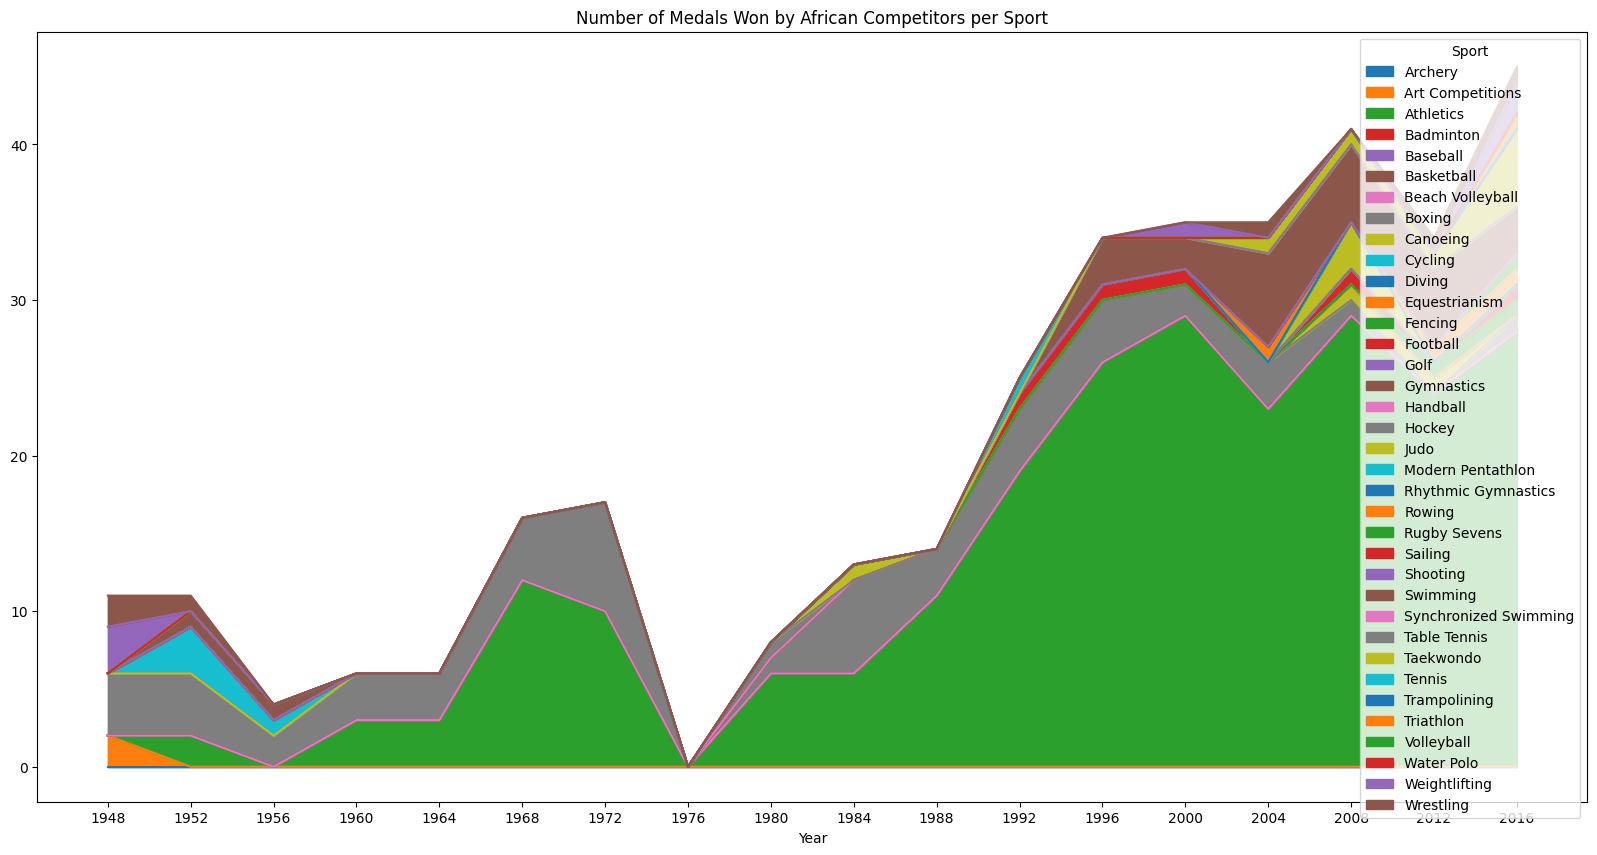

In [71]:
pv_medals_africa = df_summer.loc[df_summer['Continent']=='Africa'].pivot_table(index='Year', columns='Sport', 
                                                                               values='Medal_key', 
                                                                               aggfunc='nunique')
pv_medals_africa.plot.area(figsize=(20,10))
plt.xticks(list(pv_medals_africa.index))
plt.title("Number of Medals Won by African Competitors per Sport")
plt.show()

In [72]:
rainbows = ["f4be58","db4d00","f0a315","fff108","6caf00","00755c","00a3af","0052af","3700af","8000af", "ff0c0c",
            "ff7931","f4be58","fff651","a3ff10","00e7b5","10efff","1080ff","5c10ff","bf10ff"]

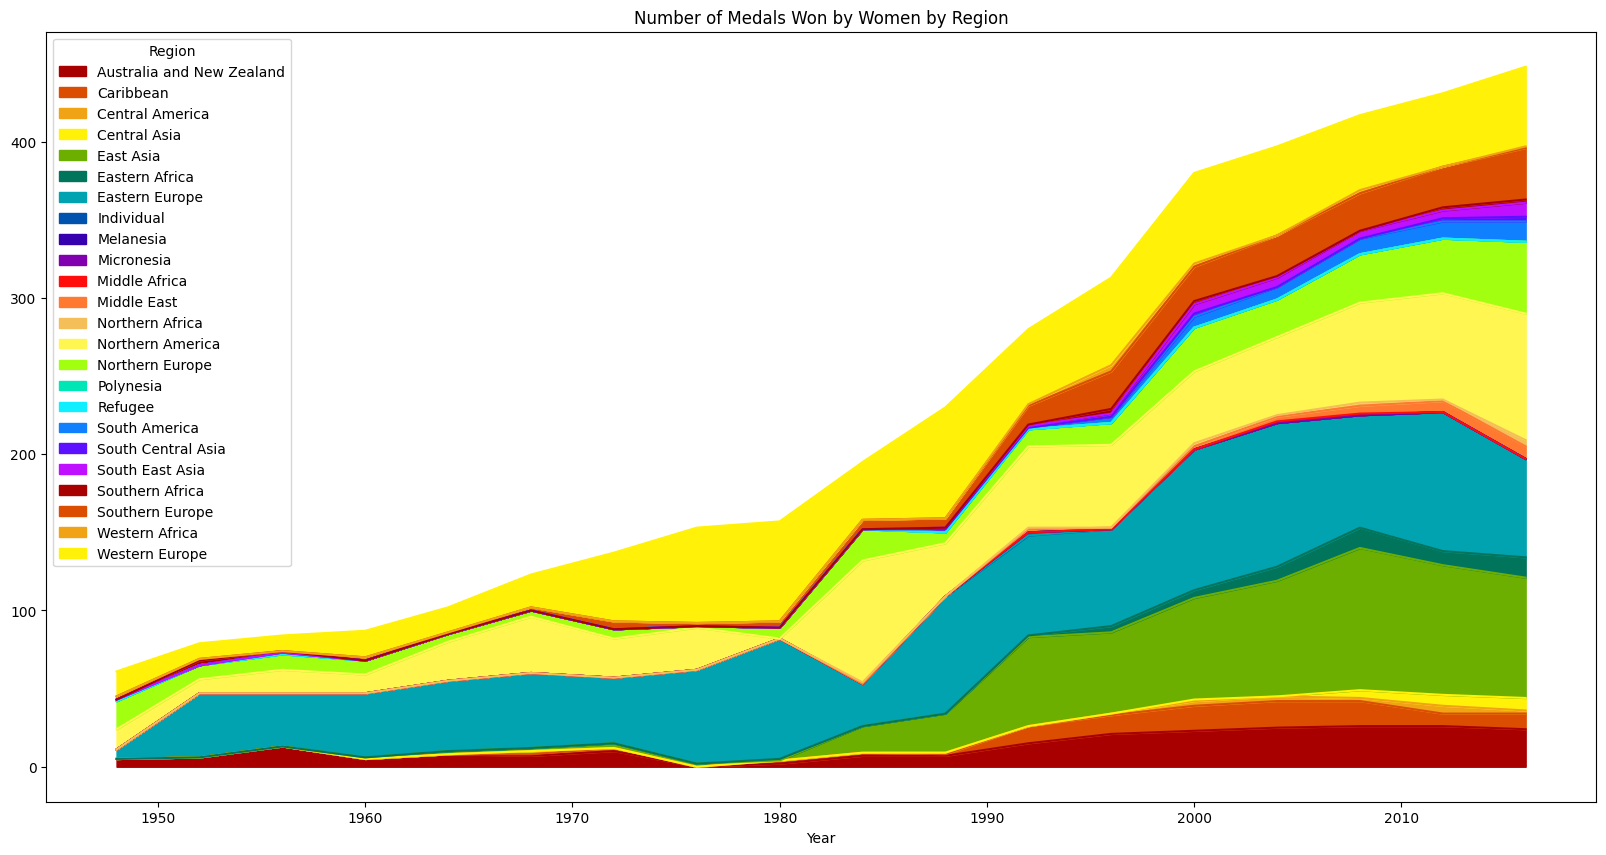

In [73]:
pv_sumwomen = df_summer[df_summer['Sex']=='F'].pivot_table(index='Year', columns='Region', values='Medal_key',
                                                           aggfunc='nunique')
pv_sumwomen.plot.area(figsize=(20,10), color=rainbow)
plt.title("Number of Medals Won by Women by Region")
plt.show()

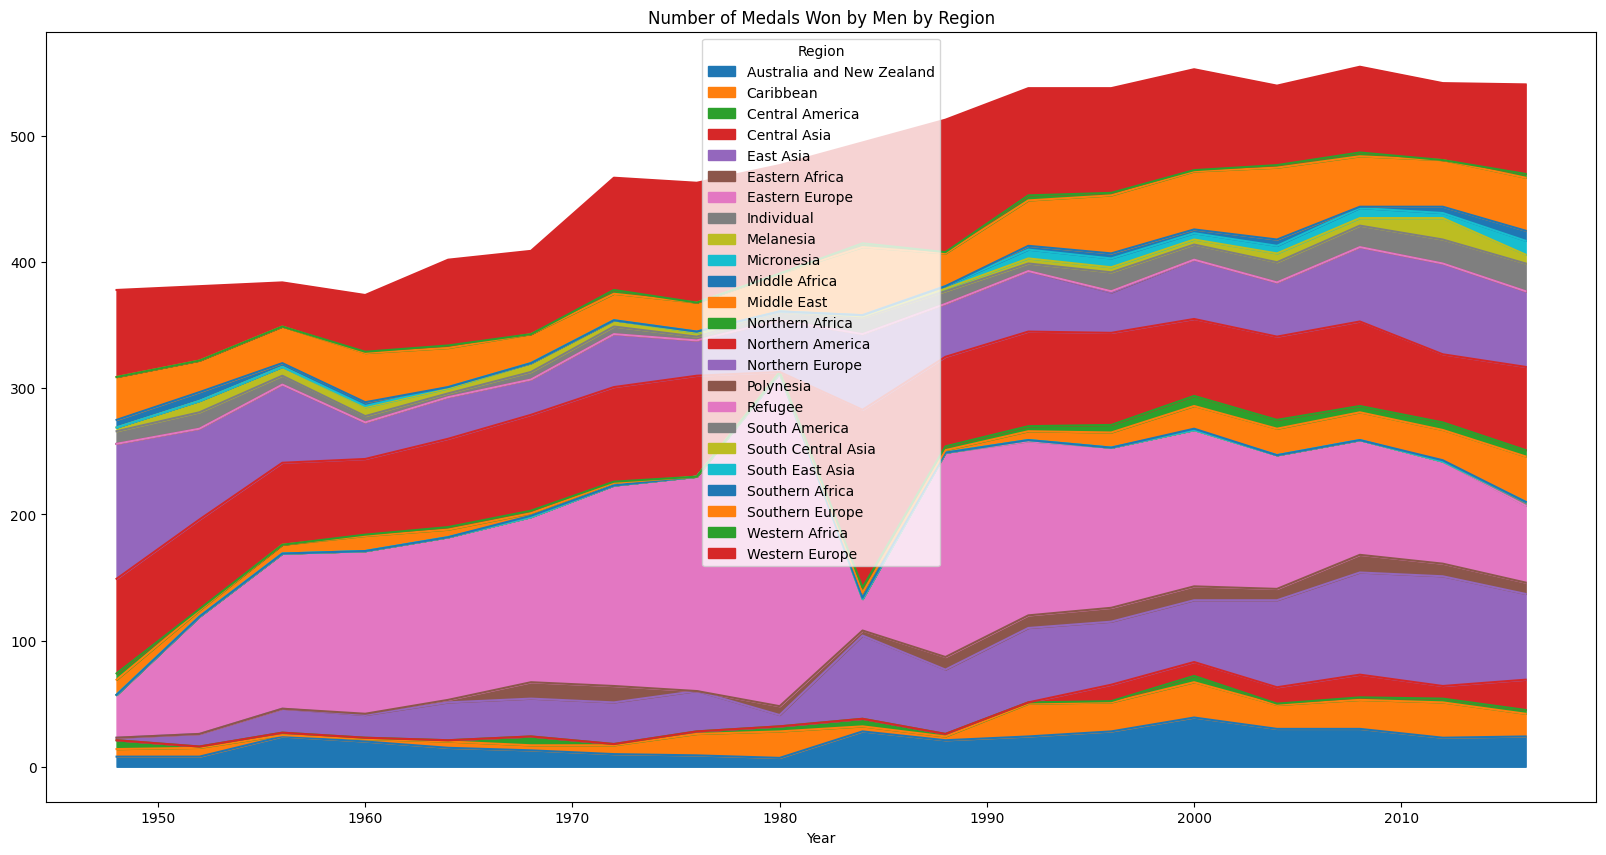

In [74]:
pv_summen = df_summer[df_summer['Sex']=='M'].pivot_table(index='Year', columns='Region', values='Medal_key', 
                                                         aggfunc='nunique')
pv_summen.plot.area(figsize=(20,10))
plt.title("Number of Medals Won by Men by Region")
plt.show()

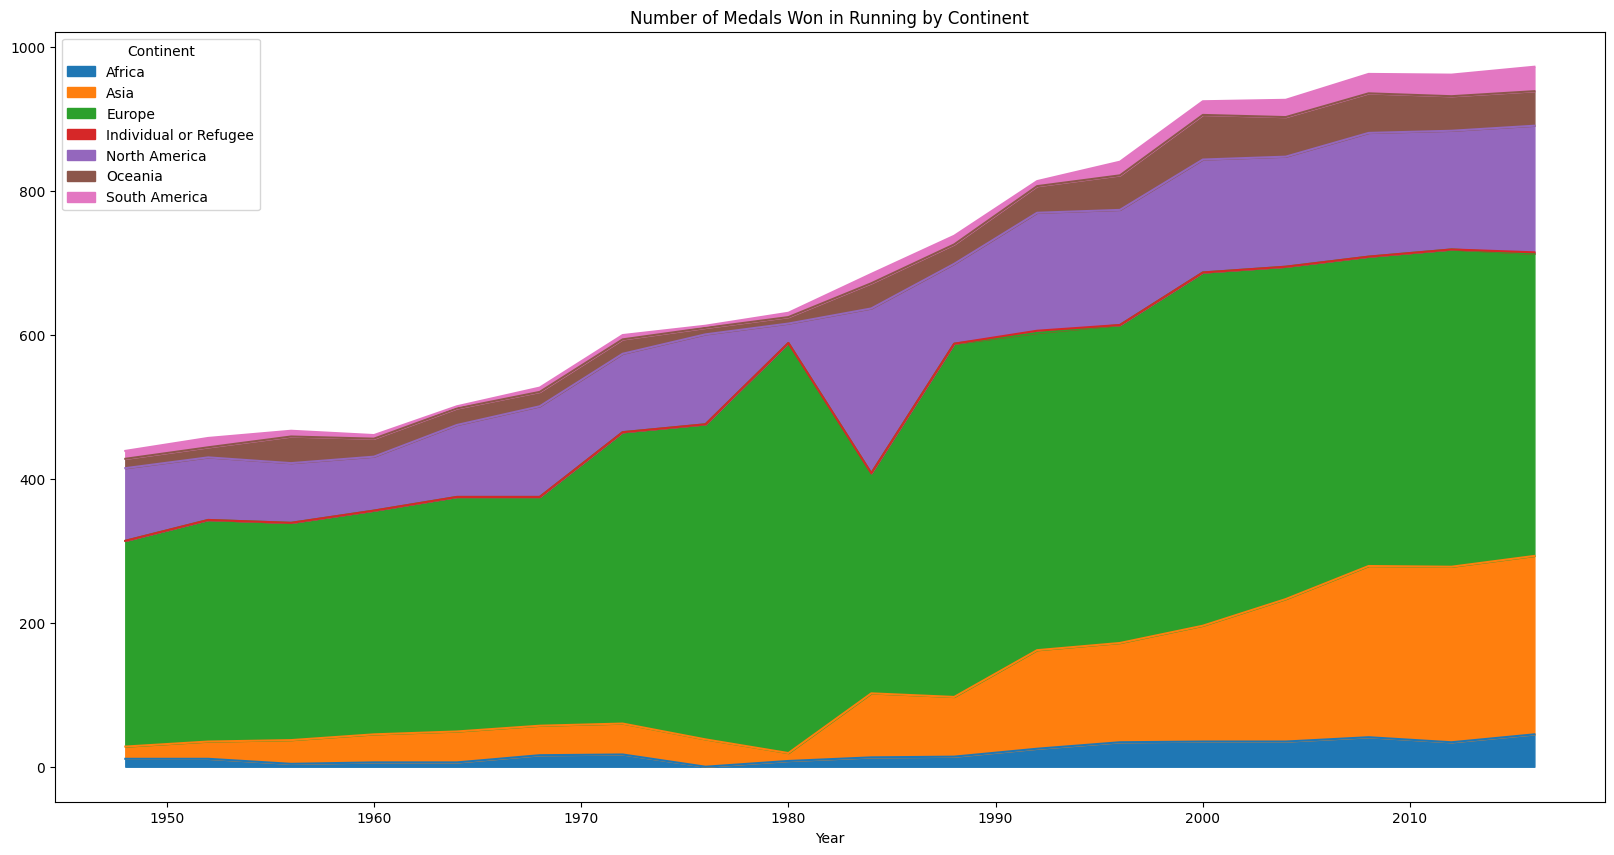

In [75]:
running_medals = df_summer.pivot_table(index='Year', columns='Continent', values='Medal_key', 
                                       aggfunc='nunique')
running_medals.plot.area(figsize=(20,10))
plt.title("Number of Medals Won in Running by Continent")
plt.show()